# WQD7003 : DATA ANALYTICS (Group Project)

## Flight Ticket Price Prediction

## Group 7


JOER YEOH (22077700)

MUHAMMAD SYAHIRUL KHALIQ BIN MOHAMED AIDI SHAHRIZ (22075208)

SAIDATUL HANIDA BINTI MOHD YUKHI (22082961)

VINOD KUNHI KRISHNAN ANNUKARAN (22079942)

IZZAH ATHIRAH BINTI MOHAMAD RADZI (S2179297)

# 1. Introduction

## 1.1 Project Background

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website published in Kaggle and to conduct various statistical hypothesis tests in order to get meaningful information from it. Various statistical algorithm would be used to train the dataset and predict a continuous target variable.

'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## 1.2 Problem Statement

It’s really not easy to guess the price of a flight ticket. The price changes every hour/day/week/month and one person could get more expensive ticket now compared to other person buying the same ticket at a later time, and vice versa.

To better understand how to actually estimate the price of a flight ticket, we have studied a dataset from the “EaseMyTrip” website that shows the booking history of passengers who travelled between India’s top six metro cities from February 11th to March 31st, 2022.


## 1.3 Project Objective

To analyze the flight booking dataset obtained from “EaseMyTrip” website to discover valuable insights that will be of great help to the passengers to get best ticket prices

# 2. Data Understanding

In this phase, the following steps were taken:
- **Initial Data Collection:** The dataset was downloaded from Kaggle Datasets. The dataset we have acquired comes in two parts, namely flights for economy class and business class. Here, we can load both parts of the dataset into two Pandas data frames by parsing the comma-separated values files.
- **Data Description**: A data dictionary providing detailed information about the variables and their attributes is constructed. It serves as a reference guide, enhancing data understanding and facilitating effective data management by disseminating essential metadata.
- **Data Quality Verification**: Identify missing values and assess opportunities for deriving new columns or removing irrelevant columns.

## 2.1 Initial Data Collection

The original dataset for the subsequent analyses originates from Kaggle Datasets. It is secondary data created from the EaseMyTrip website, an Indian online travel company based in Delhi. Specifically, the author used the Octoparse scraping tool to extract the data from the raw HTML strings. In addition, the dataset comes in two parts: one for economy class tickets and another for business class tickets. Both parts total 300,261 distinct flight booking options over 50 days, from February 11th to March 31st, 2022. The counts of flights are 206,774 and 93,487 for economy and business class, respectively.

The characteristics of the dataset are summarized below:
- Contains 300,000+ flight booking options from EaseMyTrip.
- In two parts: one for economy class tickets and another for business class tickets.
- Obtained from Kaggle Datasets.

## 2.2 Importing Libraries

The codes below are used to import various libraries and modules that will be used for our analysis.

1. `import json`: To provide functions for working with JSON data.

2. `import re`: To provide regular expression matching operations.

3. `from catboost import CatBoostRegressor`: a gradient boosting algorithm that is known for its ability to handle categorical features efficiently.

4. `from hyperopt import hp, STATUS_OK, Trials, fmin, tpe`: hyperopt` is a library for hyperparameter optimization. The imported elements include:
   - `hp`: To define search spaces for hyperparameters.
   - `STATUS_OK`: Status of a successful evaluation in hyperopt.
   - `Trials`: Keeps track of the hyperparameter optimization trials.
   - `fmin`: To minimize an objective function using a specified search algorithm.
   - `tpe`: a tree-structured Parzen estimator (TPE) algorithm, which is one of the search algorithms available in hyperopt.

5. `from lightgbm import log_evaluation, LGBMRegressor`: a gradient boosting algorithm that is known for its efficiency and speed. The imported elements include:
   - `log_evaluation`: To customize the logging during training of LightGBM models.
   - `LGBMRegressor`: Represents the LightGBM regressor, which is used for regression tasks.

6. `import matplotlib.pyplot as plt`: To provide a MATLAB-like interface for creating visualizations.

7. `import numpy as np`: To provide support for large, multi-dimensional arrays and mathematical functions.

8. `import pandas as pd`: To provide data structures and functions for efficiently working with structured data, such as tabular data.

9. `import seaborn as sns`: To provide a high-level interface for creating visualization

10. `from sklearn.ensemble import RandomForestRegressor`: an ensemble machine learning model based on decision trees, used for regression tasks.

11. `from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor`: multiple linear regression models

12. `from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score`: various evaluation metrics commonly used for evaluating regression models.

13. `from sklearn.model_selection import train_test_split`: To split a dataset into training and testing subsets for model evaluation.

14. `from sklearn.neighbors import KNeighborsRegressor`: a machine learning model that uses the k-nearest neighbors algorithm for regression tasks.

15. `from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler`: used for encoding categorical variables and scaling numerical features.

16. `from sklearn.svm import LinearSVR`: a support vector machine (SVM) algorithm for regression tasks.

17. `from sklearn.tree import DecisionTreeRegressor`: a decision tree algorithm used for regression tasks.

18. `from tensorflow import keras`: a high-level neural networks API that can run on top of various deep learning frameworks, including `TensorFlow`.

19. `from tensorflow.keras.callbacks import EarlyStopping`: To stop training a neural network model early based on certain conditions, such as no improvement in the validation loss.

20. `from tensorflow.keras.layers import Dense, Dropout, Input`:`Dense` represents a fully connected layer, `Dropout` represents a regularization technique that randomly drops out a fraction of input units during training, and `Input` represents the input layer.

21. `from tensorflow.keras.models import Sequential`: a linear stack of neural network layers.

22. `from tensorflow.keras.optimizers import Adam`: an optimization algorithm commonly used for training neural networks.

23. `from xgboost import XGBRegressor, plot_importance`: `XGBRegressor` is an implementation of the gradient boosting algorithm for regression tasks, and `plot_importance` is a function used to plot feature importances in XGBoost models.

24. `%matplotlib inline`: This is a magic command used in Jupyter notebooks or iPython environments to display matplotlib plots directly in the notebook.

25. `%config InlineBackend.figure_formats = ['retina']`: This sets the configuration for the figure formats in the notebook, specifying that the 'retina' format should be used for better quality plots on high-resolution displays.


In [1]:
import json
import re

from catboost import CatBoostRegressor
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
from joblib import dump, load
from lightgbm import log_evaluation, LGBMRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from xgboost import XGBRegressor, plot_importance

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

## 2.3 Data Loading

As the dataset comes in two CSV files, we read the contents and loaded them into two separate data frames, namely, `df_eco` and `df_biz`.

In [2]:
df_eco = pd.read_csv("dataset/economy.csv", thousands=',')
df_biz = pd.read_csv("dataset/business.csv", thousands=',')

Then, we displayed the top few rows of the data frames to inspect the structure and content of the data, including column names and a preview of data values, allowing us to glimpse the data and assess its quality, format, and initial patterns.

In [3]:
df_eco_disp = df_eco.copy()
df_biz_disp = df_biz.copy()
df_eco_disp.stop = df_eco_disp.stop.str.slice(0, 8)
df_biz_disp.stop = df_biz_disp.stop.str.slice(0, 8)

pd.concat((df_eco.head(), df_biz_disp.head()))

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t,23:55,Mumbai,46690


## 2.4 Data Description

There are 11 columns in this flight ticket price prediction dataset, which includes airlines, source city, departure and arrival time, destination, etc. The various features of the raw dataset are explained below:

- `date`: The departure date consists of the day, month, and year components, providing a complete representation of when the flight takes off.
- `airline`: The airline column in the dataset contains the names of airline companies. This categorical feature encompasses a total of six different airlines.
- `ch_code`: The "ch_code" represents a character-based flight code, typically consisting of alphabetic characters. This code may include letters corresponding to the airline, airport, or specific flight route.
- `num_code`: The "num_code" refers to a numerical flight code, typically composed of numeric digits. This code is usually assigned sequentially or based on certain conventions and may not carry any specific meaning. It is commonly used for internal tracking or system purposes.
- `dep_time`: The departure time represents when an aircraft is expected to take off and begin its journey to the destination. Departure time is typically specified using a 24-hour clock format, indicating hours and minutes.
- `from`: The departure city refers to the specific city from which a flight originates or takes off. It is a categorical feature with six unique cities.
- `time_taken`: A continuous feature that represents the total time taken to travel between cities, expressed in hours and minutes.
- `stop`: A categorical feature with three unique values representing the number of stops between the source and destination cities.
- `arr_time`: Arrival time refers to the specific time at which a flight is scheduled to arrive at its destination airport. It indicates the estimated time of arrival (ETA) when the aircraft is expected to land and complete its journey. Arrival time is typically specified using a 24-hour clock format, indicating hours and minutes.
- `to`: The arrival city refers to the specific city where a flight is scheduled to land or arrive. It is a categorical feature with six unique cities.
- `price`: The target variable contains information about the ticket price. It serves as the dependent variable or the outcome variable that is being predicted or analyzed in a machine learning or statistical model.


## 2.5 Data Quality Verification

The summary of the data frame displays useful information such as the number of rows and columns, the data types of each column, the count of non-null values, and memory usage.

In [4]:
df_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 17.4+ MB


In [5]:
df_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 7.8+ MB


Following the summaries, there were no missing values, as the count of non-null values is identical to the length of the data frames. Subsequently, we identified the unique values in the selected columns and inconsistent categories by finding unexpected or irregular values from the unique values.

In [6]:
categorical_columns = ["airline", "ch_code", "from", "to"]
categorical_dict_eco = {}
categorical_dict_biz = {}

for column in categorical_columns:
  categorical_dict_eco[column] = df_eco[column].unique()
  categorical_dict_biz[column] = df_biz[column].unique()

print("Economy Class")
display(pd.DataFrame.from_dict(categorical_dict_eco, orient="index"))
print(df_eco["stop"].unique()[:5])

print("\n", "Business Class")
display(pd.DataFrame.from_dict(categorical_dict_biz, orient="index"))
print(df_biz["stop"].unique()[:5])

Economy Class


,0,1,2,3,4,5,6,7
airline,SpiceJet,AirAsia,Vistara,GO FIRST,Indigo,Air India,Trujet,StarAir
ch_code,SG,I5,UK,G8,6E,AI,2T,S5
from,Delhi,Mumbai,Bangalore,Kolkata,Hyderabad,Chennai,None,None
to,Mumbai,Bangalore,Kolkata,Hyderabad,Chennai,Delhi,None,None


['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t']

 Business Class


,0,1,2,3,4,5
airline,Air India,Vistara,None,None,None,None
ch_code,AI,UK,None,None,None,None
from,Delhi,Mumbai,Bangalore,Kolkata,Hyderabad,Chennai
to,Mumbai,Bangalore,Kolkata,Hyderabad,Chennai,Delhi


['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t']


Based on the displayed outputs, it is evident that the "stop" column contains inconsistent data characterized by the presence of control characters, such as newline and tab characters, within the words. Next, we identified and displayed the duplicated rows in the data frame. We will remove the duplicated rows in the next phase.

In [7]:
df_eco_duplicated = df_eco.duplicated(keep=False)
df_biz_duplicated = df_biz.duplicated(keep=False)

print(f"Number of duplicated rows (Economy Class): {np.sum(df_eco_duplicated) // 2}")
print(f"Number of duplicated rows (Business Class): {np.sum(df_biz_duplicated) // 2}")

df_eco_disp[df_eco_duplicated == True]

Number of duplicated rows (Economy Class): 2
Number of duplicated rows (Business Class): 0


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
516,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t,08:35,Mumbai,12150
563,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t,08:35,Mumbai,12150
6080,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t,13:35,Mumbai,4780
6181,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t,13:35,Mumbai,4780


The distribution of the price for economy class tickets is right-skewed, having the value of more than zero. This signal an opportunity to perform log transformation and make the distribution more symmetrical.

In [110]:
print(f"Skewness (Economy Class): {df_eco.price.skew()}")
print(f"Skewness (Business Class): {df_biz.price.skew()}")

Skewness (Economy Class): 1.7032275199161917
Skewness (Business Class): -0.09523708580664521


# 3. Data Preprocessing

## 3.1 Data Selection

We can begin by computing the Pearson correlation coefficients between the numerical features. If the correlations between variables are too strong that another variable does not convey extra information, we can remove them. In our case, the evaluation will happen during the Exploratory Data Analysis.

## 3.2 Data Cleaning

We started with removing duplicate rows from our DataFrame. The inplace=True parameter ensures that the operation is performed directly on the DataFrame df without creating a new copy.

In [8]:
def deduplicate(df):
  df.drop_duplicates(inplace=True, ignore_index=True)

We renamed some columns so that they would be more descriptive and easier to understand:

In [9]:
def rename_columns(df):
    df.rename(
        columns={
            "from": "source_city",
            "to": "destination_city",
            "dep_time": "departure_time",
            "arr_time": "arrival_time"
        },
        inplace=True
    )

We created a new 'create_days_left_feature' function to add a new feature called "days_left" to our DataFrame. It converts the "date" column to a datetime format, calculates the booking date by finding the minimum date, and calculates the number of days between each date and the booking date, storing the results in the "days_left" column:

In [10]:
def create_days_left_feature(df):
    df.date = pd.to_datetime(df.date, format="%d-%m-%Y")
    booking_date = df.date.min() - pd.Timedelta(days=1)

    df["days_left"] = (df.date - booking_date).dt.days

We created a new feature called "flight" by concatenating two existing columns which are 'ch_code' and 'num_code' from 'df_eco' DataFrame:

In [11]:
def create_flight_feature(df):
    df["flight"] = df_eco.ch_code + "-" + df_eco.num_code.astype(str)

    return df

We created a new function called 'create_departure_feature' that splits the "departure_time" column into separate hour and minute columns, replaces the original column with the new columns, and converts the values in these new columns to integers. This allows for easier analysis and manipulation of the departure time data in the DataFrame:

In [12]:
def create_departure_feature(df):
    cols = ["departure_time_hr", "departure_time_min"]

    df[cols] = df.departure_time.str.split(":", expand=True)
    df[cols] = df[cols].astype(np.int64)

We created a new function called 'create_arrival_feature' that splits the "arrival_time" column into separate hour and minute columns, replaces the original column with the new columns, and converts the values in these new columns to integers:

In [13]:
def create_arrival_feature(df):
    cols = ["arrival_time_hr", "arrival_time_min"]

    df[cols] = df.arrival_time.str.split(":", expand=True)
    df[cols] = df[cols].astype(np.int64)

We created below 'create_duration_feature' function that extracts the hour and minute components from a time taken string in the "time_taken" column of the DataFrame, calculates the total duration in minutes, and stores the durations in a new "duration" column:

In [14]:
def create_duration_feature(df):
    def transform_time_taken(item):
        hour, minute = re.search("([\d.]*)h ([\d.]*)m", item).groups()

        return float(minute or 0) + float(hour or 0) * 60

    df["duration"] = df.time_taken.apply(transform_time_taken)

After that, we created 'create_via_feature' function that extracts stop and via information from the "stop" column of the DataFrame, cleanse the data by removing newline and tab characters, assigns default values if via information is missing, and creates two new columns, "stops" and "via", in the DataFrame to store the extracted values:

In [15]:
def create_via_feature(df):
    stops = []
    via_list = []

    for item in df.stop:
        item = re.sub("[\n\t]+", " ", item)
        stop, via = re.search("([\w+-]+)(?: Via (\w+))?", item).groups()

        if not via:
            via = "UNK"

        stops.append(stop)
        via_list.append(via)

    df["stops"] = pd.Series(stops)
    df["via"] = pd.Series(via_list)

We created 'create_class_feature' function to add a new column called "class" in the DataFrame and assigns the value of the class_ variable to all the rows in that column:

In [16]:
def create_class_feature(df, class_):
    df["class"] = class_

We performed a series of data transformations on the 'df_eco' DataFrame and stores the modified DataFrame in 'df_eco_t':

In [17]:
df_eco_t = df_eco.copy()

deduplicate(df_eco_t)
rename_columns(df_eco_t)
create_days_left_feature(df_eco_t)
create_flight_feature(df_eco_t)
create_departure_feature(df_eco_t)
create_arrival_feature(df_eco_t)
create_duration_feature(df_eco_t)
create_via_feature(df_eco_t)
create_class_feature(df_eco_t, "Economy")

df_eco_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206772 entries, 0 to 206771
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                206772 non-null  datetime64[ns]
 1   airline             206772 non-null  object        
 2   ch_code             206772 non-null  object        
 3   num_code            206772 non-null  int64         
 4   departure_time      206772 non-null  object        
 5   source_city         206772 non-null  object        
 6   time_taken          206772 non-null  object        
 7   stop                206772 non-null  object        
 8   arrival_time        206772 non-null  object        
 9   destination_city    206772 non-null  object        
 10  price               206772 non-null  int64         
 11  days_left           206772 non-null  int64         
 12  flight              206772 non-null  object        
 13  departure_time_hr   206772 no

We performed another series of data transformations on the 'df_biz' DataFrame and stores the modified DataFrame in 'df_biz_t':

In [18]:
df_biz_t = df_biz.copy()

rename_columns(df_biz_t)
create_days_left_feature(df_biz_t)
create_flight_feature(df_biz_t)
create_departure_feature(df_biz_t)
create_arrival_feature(df_biz_t)
create_duration_feature(df_biz_t)
create_via_feature(df_biz_t)
create_class_feature(df_biz_t, "Business")

df_biz_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                93487 non-null  datetime64[ns]
 1   airline             93487 non-null  object        
 2   ch_code             93487 non-null  object        
 3   num_code            93487 non-null  int64         
 4   departure_time      93487 non-null  object        
 5   source_city         93487 non-null  object        
 6   time_taken          93487 non-null  object        
 7   stop                93487 non-null  object        
 8   arrival_time        93487 non-null  object        
 9   destination_city    93487 non-null  object        
 10  price               93487 non-null  int64         
 11  days_left           93487 non-null  int64         
 12  flight              93487 non-null  object        
 13  departure_time_hr   93487 non-null  int64     

## 3.3 Data Integration

After all that, we concatenated two DataFrames, 'df_eco_t' and 'df_biz_t', into a single DataFrame called df and used df.info() to display information about the structure and data types of the DataFrame:

In [19]:
df = pd.concat([df_eco_t, df_biz_t])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 93486
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                300259 non-null  datetime64[ns]
 1   airline             300259 non-null  object        
 2   ch_code             300259 non-null  object        
 3   num_code            300259 non-null  int64         
 4   departure_time      300259 non-null  object        
 5   source_city         300259 non-null  object        
 6   time_taken          300259 non-null  object        
 7   stop                300259 non-null  object        
 8   arrival_time        300259 non-null  object        
 9   destination_city    300259 non-null  object        
 10  price               300259 non-null  int64         
 11  days_left           300259 non-null  int64         
 12  flight              300259 non-null  object        
 13  departure_time_hr   300259 non-null

In [20]:
# df.to_csv("dataset/cleaned.csv")

## 3.4 Data Formatting

We defined two lists, 'categorical_features' and 'numerical_features', and combined them into a single list called 'features'. We set the target variable to "price" which suggests that the dataset contains information about flight prices, and the goal is to analyze the prices based on the provided features.

In [21]:
# Exclude ch_code, num_code, time_taken, departure_time, arrival_time, stop

categorical_features = [
    "date",
    "airline",
    "flight",
    "source_city",
    "destination_city",
    "stops",
    "via",
    "class"
]

numerical_features = [
    "days_left",
    "departure_time_hr",
    "departure_time_min",
    "arrival_time_hr",
    "arrival_time_min",
    "duration",
]

features = categorical_features + numerical_features
target = "price"

First, we split the dataset into train and test sets with a proportion of 75:25. Then, we further perform a 90:10 split on the train set, in which 90% of the data will be used for training, and the remaining will be used for validation.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != target],
    df[target],
    random_state=12345
)

X_train, X_val, y_train, y_val = train_test_split(
  X_train,
  y_train,
  test_size=0.1,
  random_state=12345
)

In [23]:
print(X_train.shape)
print(y_train.shape)
print()

print(X_val.shape)
print(y_val.shape)
print()

print(X_test.shape)
print(y_test.shape)

(202674, 20)
(202674,)

(22520, 20)
(22520,)

(75065, 20)
(75065,)


We transformed the categorical features in the training, validation, and test datasets into numerical values:

In [24]:
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

X_train_cat = oe.fit_transform(X_train[categorical_features])
X_val_cat = oe.transform(X_val[categorical_features])
X_test_cat = oe.transform(X_test[categorical_features])

We combined categorical and numerical features of each respective dataset (training, validation, and test) into a single array. This process is commonly performed to create a feature matrix that can be used as input to machine learning algorithms.

In [25]:
X_train_mat = np.hstack((X_train_cat, X_train[numerical_features]))
X_val_mat = np.hstack((X_val_cat, X_val[numerical_features]))
X_test_mat = np.hstack((X_test_cat, X_test[numerical_features]))

Below code performs feature scaling using 'MinMaxScaler' on the input features (X_train_mat, X_val_mat, and X_test_mat), ensuring that they are within a specified range. Additionally, it applies the log1p() transformation to the target variables (y_train, y_val, and y_test), which can be useful for improving model performance when dealing with skewed target distributions:

In [26]:
mm = MinMaxScaler()

X_train_scaled = mm.fit_transform(X_train_mat)
X_val_scaled = mm.transform(X_val_mat)
X_test_scaled = mm.transform(X_test_mat)

y_train_scaled = np.log1p(y_train)
y_val_scaled = np.log1p(y_val)
y_test_scaled = np.log1p(y_test)

In [27]:
# dump(oe, "artifacts/categorical_encoder.joblib", compress=3)
# dump(mm, "artifacts/scaler.joblib", compress=3)

# 4. Exploratory Data Analysis (EDA)

We created a pie chart visualization to see the distribution of different classes ("Economy" and "Business") in the "class" column. We can see the biggest chunk of airline businesses is 'Economy'.

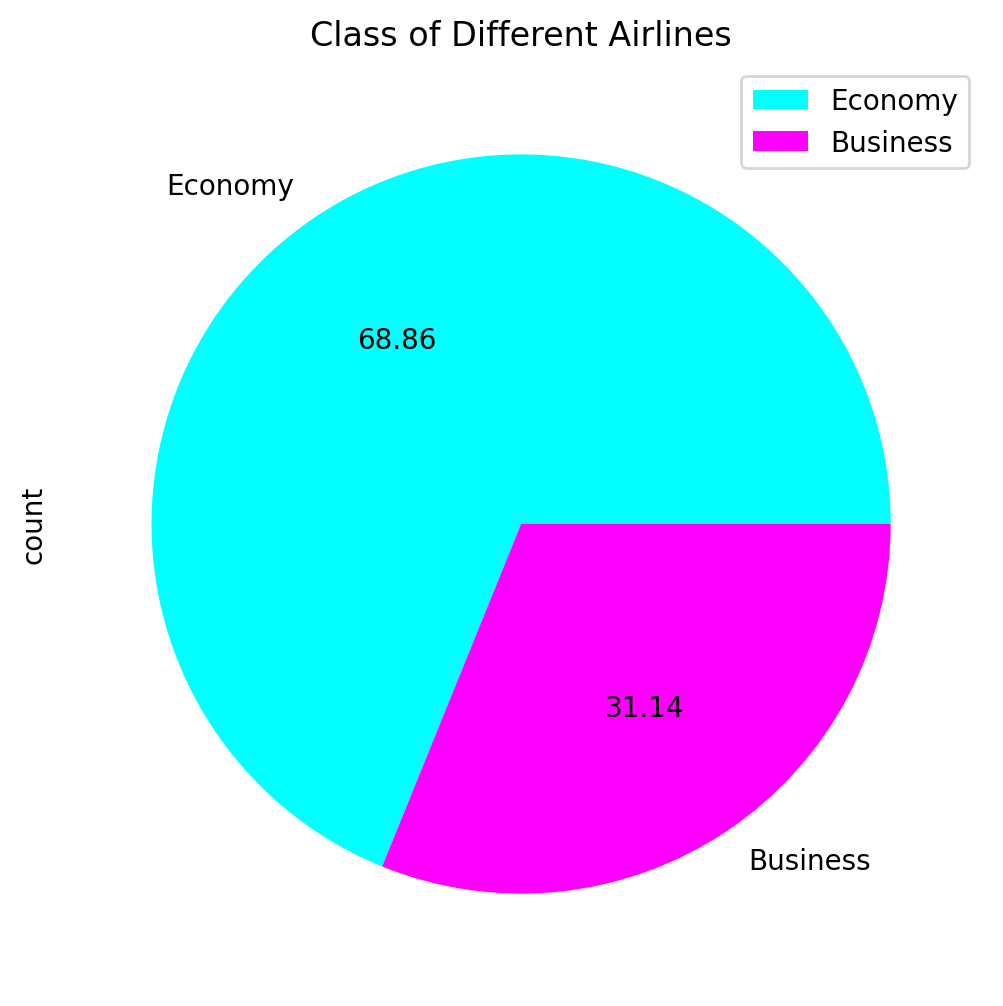

In [28]:
plt.figure(figsize =(8,6))
df["class"].value_counts().plot(kind ='pie', textprops ={'color':'black'}, cmap='cool', autopct ='%.2f')
plt.legend(['Economy','Business'])
plt.title("Class of Different Airlines")
plt.show()

After that, we created a grouped bar chart to provide insights into the distribution of classes across different airlines through cross-tabulation. We can see that some of the airlines like AirIndia and Vistara do provide Business and Economy services while the rest are focusing on Economy service only. 'Economy' service is generally more preferred compared to Business.

class      Business  Economy
airline                     
Air India     32898    47994
AirAsia           0    16098
GO FIRST          0    23177
Indigo            0    43120
SpiceJet          0     9011
StarAir           0       61
Trujet            0       41
Vistara       60589    67270


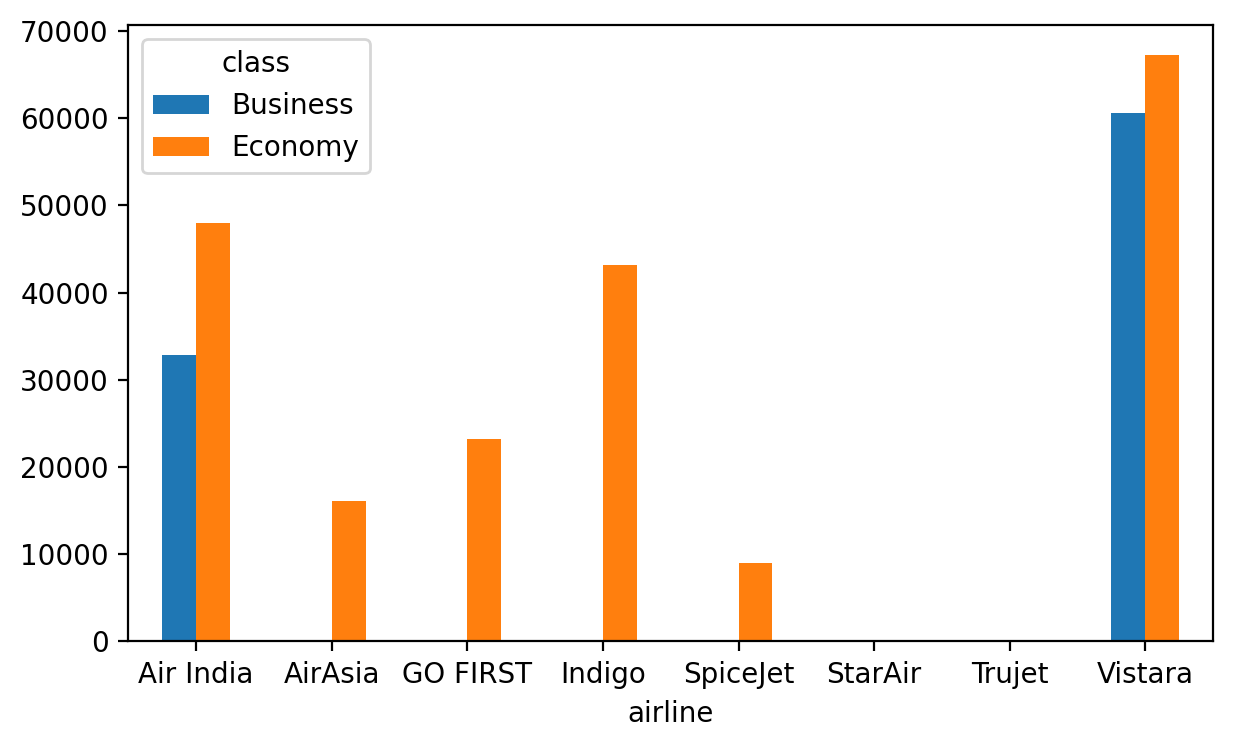

In [100]:
# Cross tabulation between airline and class
CrosstabResult=pd.crosstab(index=df['airline'],columns=df['class'])
print(CrosstabResult)

# Grouped bar chart between airline and class
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.show()

We also did some visualization of the pricing data in boxplot to see the price distribution by each airline. We can see that most of the airlines here are selling at cheap rates while AirIndia and Vistara's price are generally on the higher end compared to the rest of the airlines.

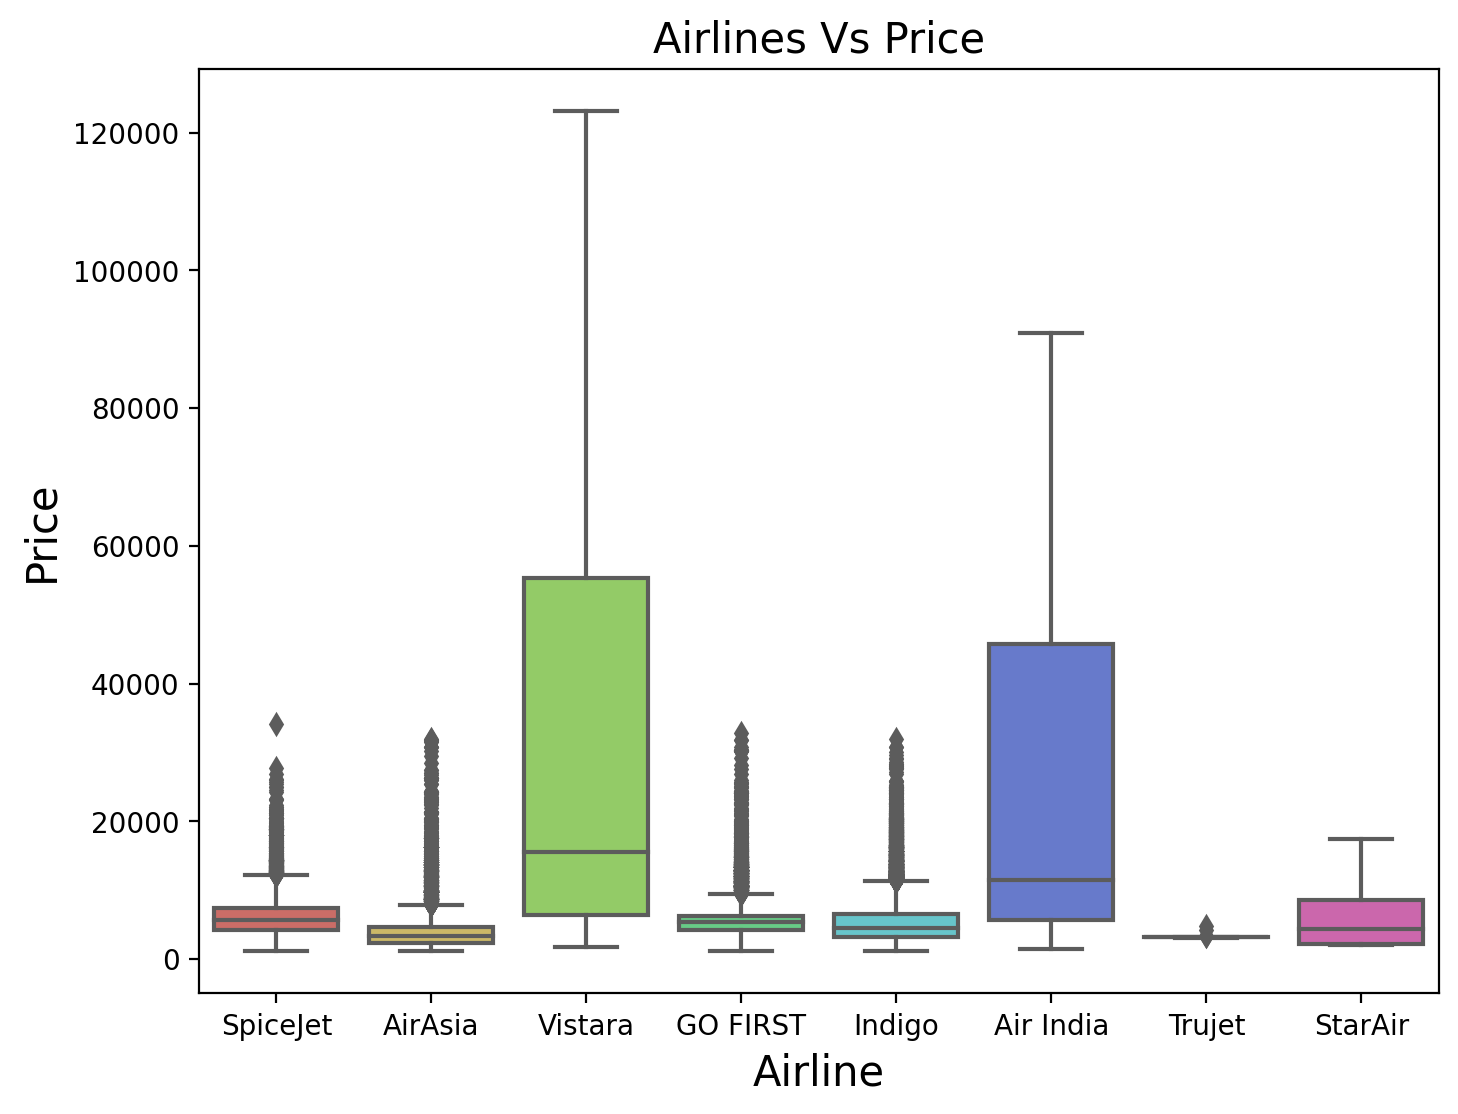

In [30]:
plt.figure(figsize =(8,6))
sns.boxplot(x=df['airline'], y= df['price'],palette='hls')
plt.title("Airlines Vs Price", fontsize=15)
plt.xlabel("Airline", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

We also visualized the cross-tabulation between two variables, "class" and "destination_city" in a grouped bar chart to see the distribution. We can see that consumers generally prefer to fly in Economy class.

destination_city  Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
class                                                                  
Business              16198    13158  16707      13675    14758   18991
Economy               34914    27210  40654      29101    34777   40116


<Axes: xlabel='class'>

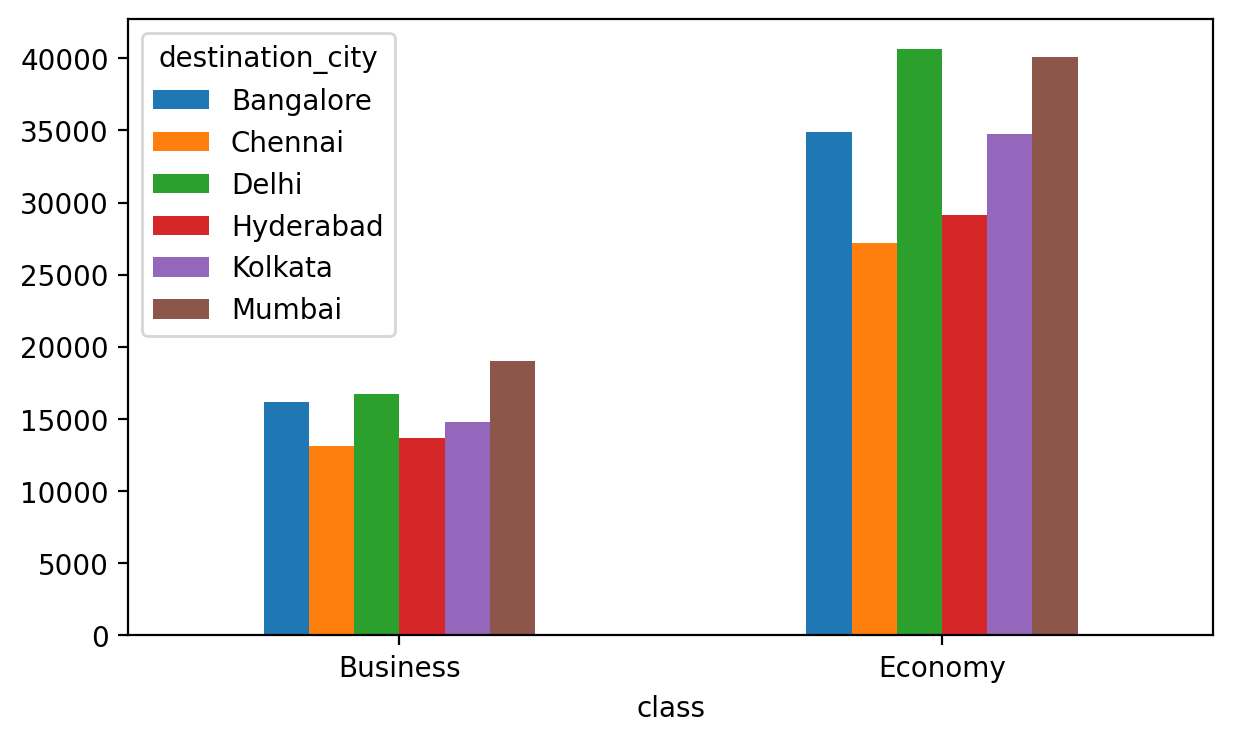

In [31]:
# Cross tabulation between class and destination
CrosstabResult=pd.crosstab(index=df['class'],columns=df['destination_city'])
print(CrosstabResult)

# Grouped bar chart between class and destination
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Following that, we created a DataFrame called 'destination' to see frequency of each destination city in the "destination_city" column. We plotted a bar chart and can see the top 3 destinations are Mumbai, Delhi and Bangalore.

In [32]:
destination= pd.DataFrame({'destination_city':df.destination_city.value_counts().index,'Counts':df.destination_city.value_counts()})
destination

,destination_city,Counts
destination_city,,
Mumbai,Mumbai,59107
Delhi,Delhi,57361
Bangalore,Bangalore,51112
Kolkata,Kolkata,49535
Hyderabad,Hyderabad,42776
Chennai,Chennai,40368


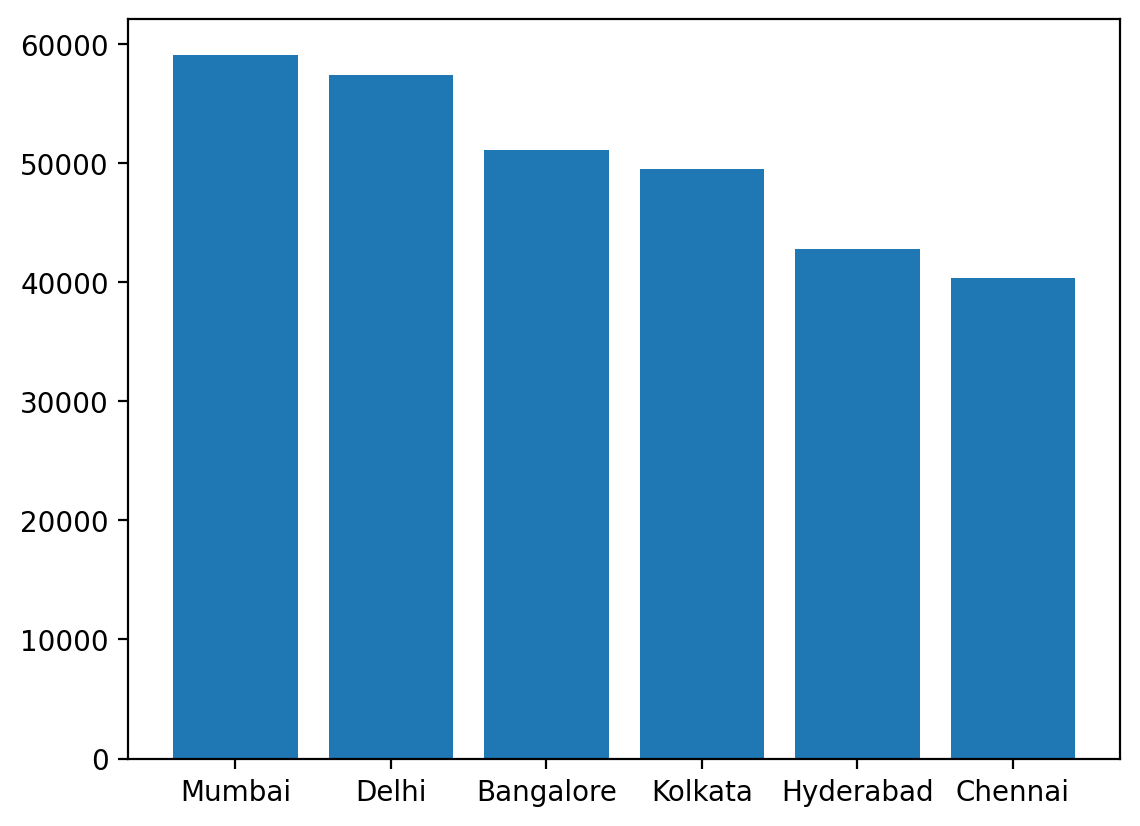

In [33]:
plt.bar(destination['destination_city'],destination['Counts'])
plt.show()

Then, we visualized the pricing data in boxplot to see the price distribution for each source city and destination city. We can see that Kolkata is the most expensive source and destination city while Delhi is the cheapest source and destination city.

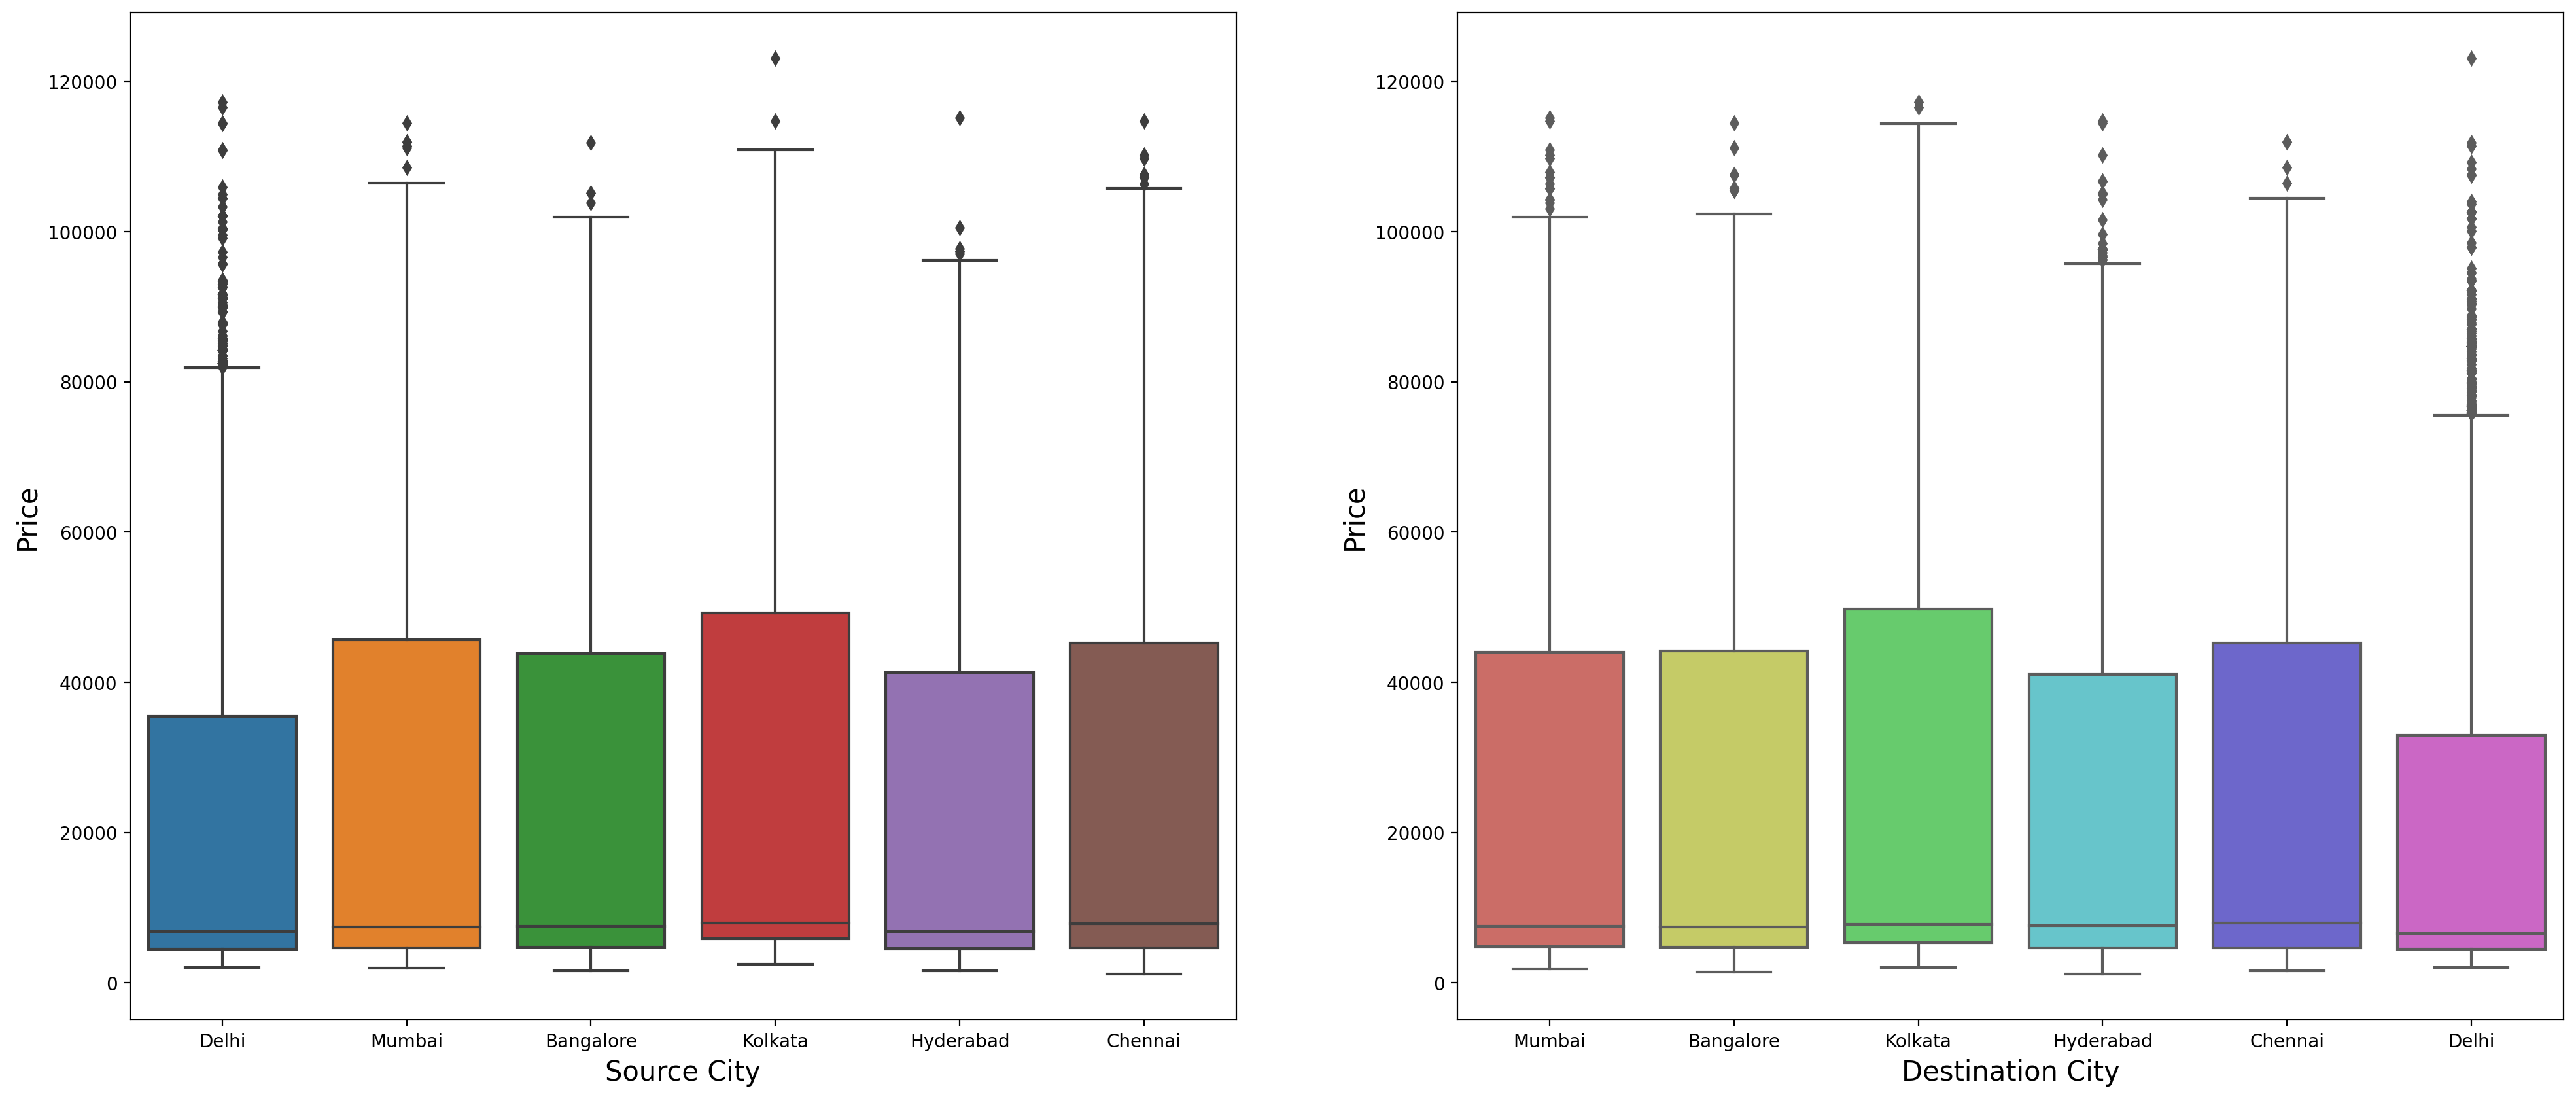

In [34]:
#To check price distribution based on source and destination city
plt.figure(figsize =(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city', y='price', data = df)
plt.xlabel("Source City", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city', y='price', data=df, palette='hls')
plt.ylabel("Price", fontsize=15)
plt.xlabel("Destination City", fontsize =15)
plt.show()

We also generated a line plot to illustrate the relationship between the number of days left before departure and the price of flight ticket. We can see that price is cheaper when there are huge gap of days between departure date and booking date. For expensive airline like AirIndia and Vistara, we can see there's huge increase closer to the date but the rate significanty dropped when it's closest to the date though it's not as cheap if you buy the ticket earlier. For the rest of the airlines, the prices are generally very expensive when it's super close to the depature date.

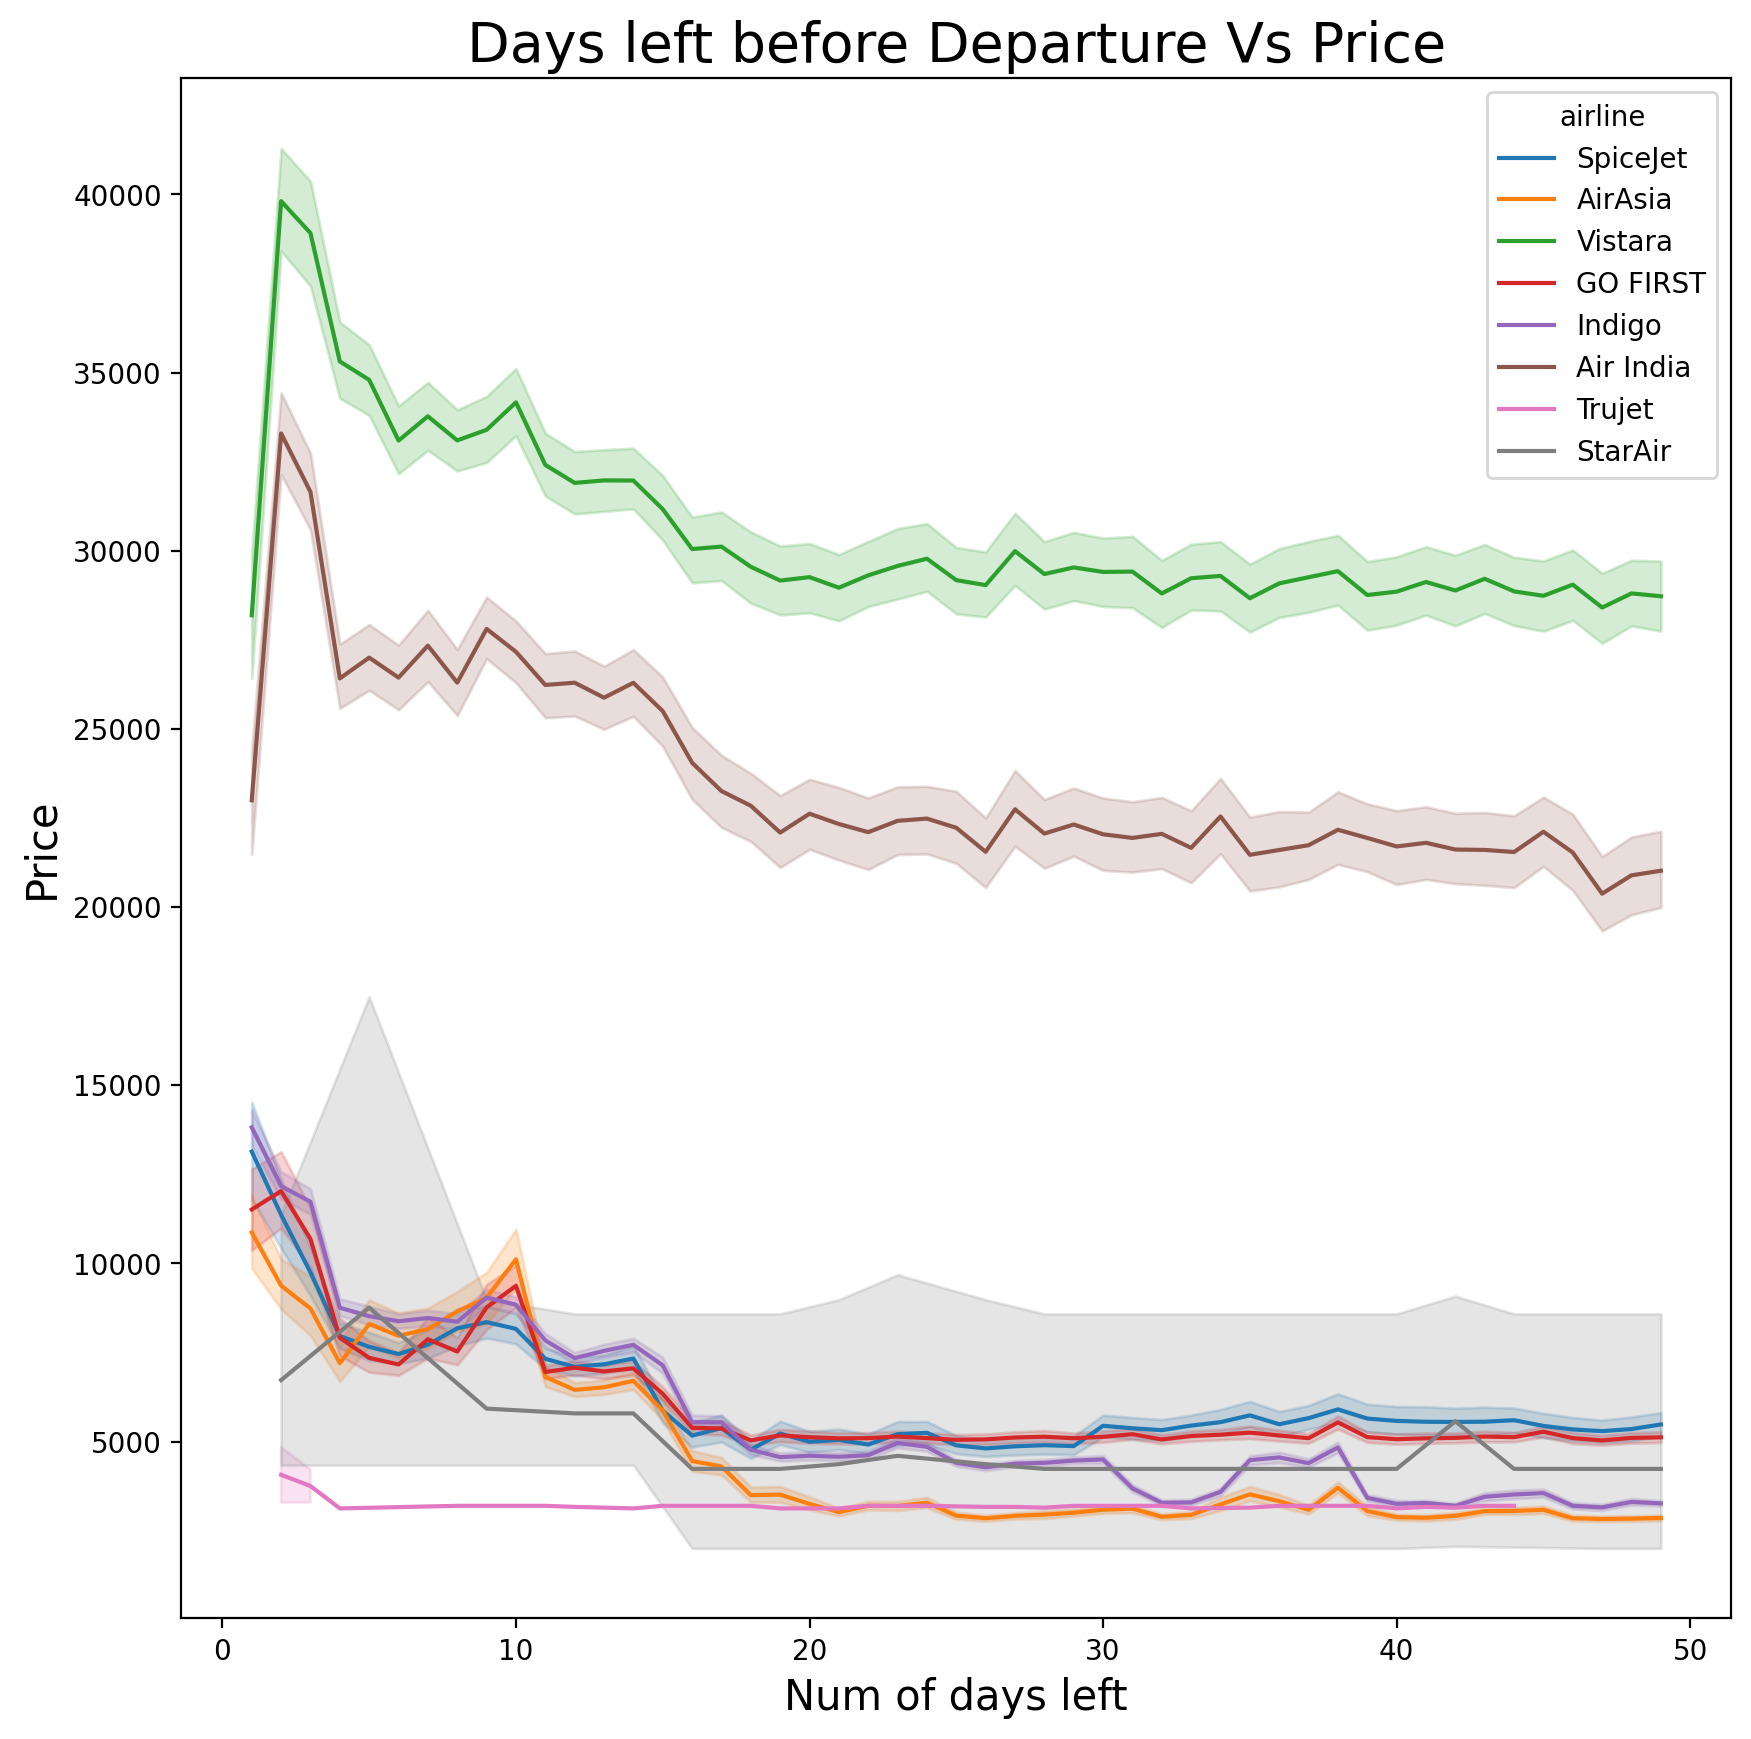

In [35]:
plt.figure(figsize=(10,10))
plt.xlabel("Num of days left", fontsize=15)
plt.ylabel("Price", fontsize=15)
sns.lineplot(data=df, x='days_left', y='price', hue='airline',color='blue')
plt.title("Days left before Departure Vs Price", fontsize=20)
plt.show()

We generated a heatmap to visualize the correlation between the numerical features and the target variable, "price". The heatmap provides a visual representation of the strength and direction of the linear relationship between these variables.

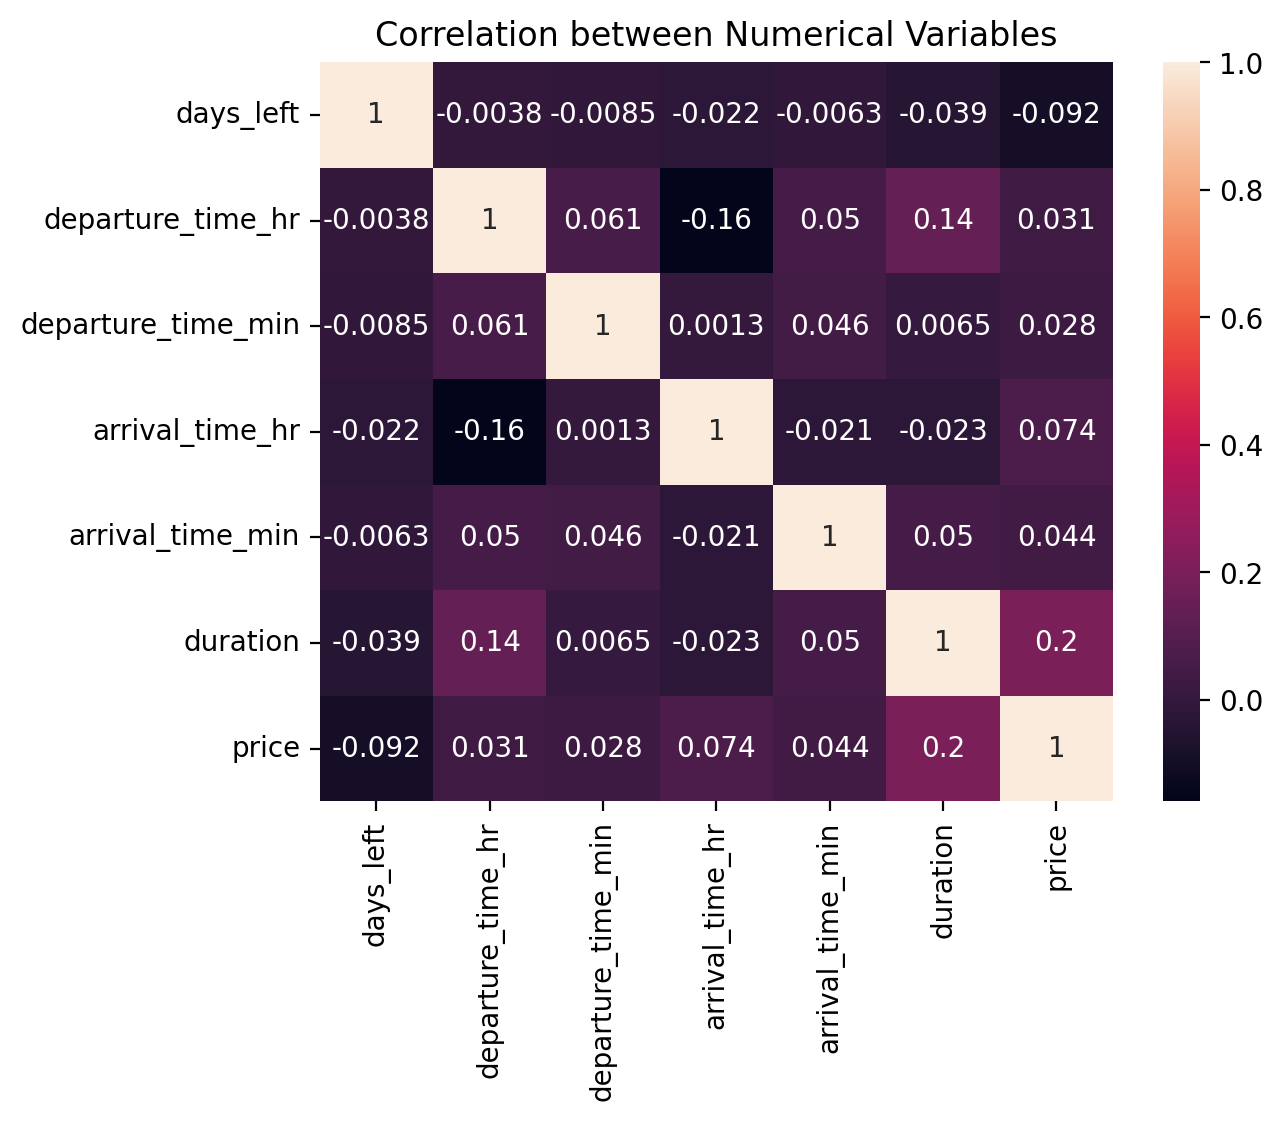

In [99]:
sns.heatmap(df[numerical_features + [target]].corr(), annot=True)

plt.title("Correlation between Numerical Variables")
plt.show()

# 5. Modelling

We decided to go with modelling techniques in three groups, which are Baselines, Ensemble Learning, and Neural Networks, to predict flight ticket prices. We then calculated various regression evaluation metrics based on the predicted and true target values (y_pred and y_test):

In [37]:
def reg_scores(y_test, y_pred):
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

def evaluate(model):
    y_pred_val = model.predict(X_val_scaled)
    y_pred_test = model.predict(X_test_scaled)

    val_mse = mean_squared_error(y_val_scaled, y_pred_val)
    test_mse = mean_squared_error(y_test_scaled, y_pred_test)

    y_pred_test_actual = np.expm1(model.predict(X_test_scaled))
    actual_scores = reg_scores(y_test, y_pred_test_actual)

    return val_mse, test_mse, actual_scores

## 5.1 Baselines

Below codes define a dictionary named 'models' that maps different regression model names to corresponding instances of those models. We also created three empty dictionaries named 'baseline_val_scores', 'baseline_test_scores', and 'baseline_test_scores_actual' to store the evaluation scores for the baseline models.

In [38]:
models = {
  "Linear Regression": LinearRegression(),
  "Lasso": Lasso(),
  "Ridge": Ridge(),
  "ElasticNet": ElasticNet(),
  "KNN": KNeighborsRegressor(),
  "SVR": LinearSVR(max_iter=2500, random_state=12345),
  "Decision Tree": DecisionTreeRegressor(random_state=12345)
}

baseline_val_scores = dict()
baseline_test_scores = dict()
baseline_test_scores_actual = dict()

This is where we set up a loop that iterates over each key-value pair in the 'models' dictionary. In each iteration, the variable 'name' will hold the key (model name), and the variable 'model' will hold the corresponding value (the regression model object). The fit( ) method functions to train the model on the given input features ('X_train_scaled') and target variable ('y_train_scaled'). After this loop, the models will be trained and ready to make predictions on new data.

In [39]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train_scaled)

In [40]:
for name, model in models.items():
  val_mse, test_mse, actual_scores = evaluate(model)

  baseline_val_scores[name] = val_mse
  baseline_test_scores[name] = test_mse
  baseline_test_scores_actual[name] = actual_scores

By iterating over the models dictionary and evaluating each model using the evaluate() function, this loop collects and stores the evaluation scores for each model on the validation and test sets in the respective dictionaries (baseline_val_scores, baseline_test_scores, and baseline_test_scores_actual). These dictionaries can later be used to compare and analyze the performance of different models.

### 5.1.1 Summary

We created a DataFrame named `baseline_val_scores_df` that is constructed from two dictionaries: `baseline_val_scores` and `baseline_test_scores`containing the validation mean squared error (MSE) scores and test MSE scores, respectively.

The `index` parameter is set to `baseline_val_scores.keys()`, which assigns the keys from the `baseline_val_scores` dictionary as the index for the DataFrame. This ensures that each MSE score is associated with its respective key.

Next, `baseline_val_scores_df.plot.bar()` function is used to generate a bar plot from the variable `ax`.
The `label` variable is formatted using f-strings to round the height value to four decimal places. The `ax.annotate()` function is used to annotate the bar. It takes the label, coordinates `(x, y)`, horizontal alignment (`ha`), and rotation angle as arguments.

From the chart below, we can see that Decision Tree is having the lowest Val MSE which indicates better performing model. On the other hand, Lasso and ElasticNet are having the highest Val MSE which we assume to be the worst performing model for Baseline technique.

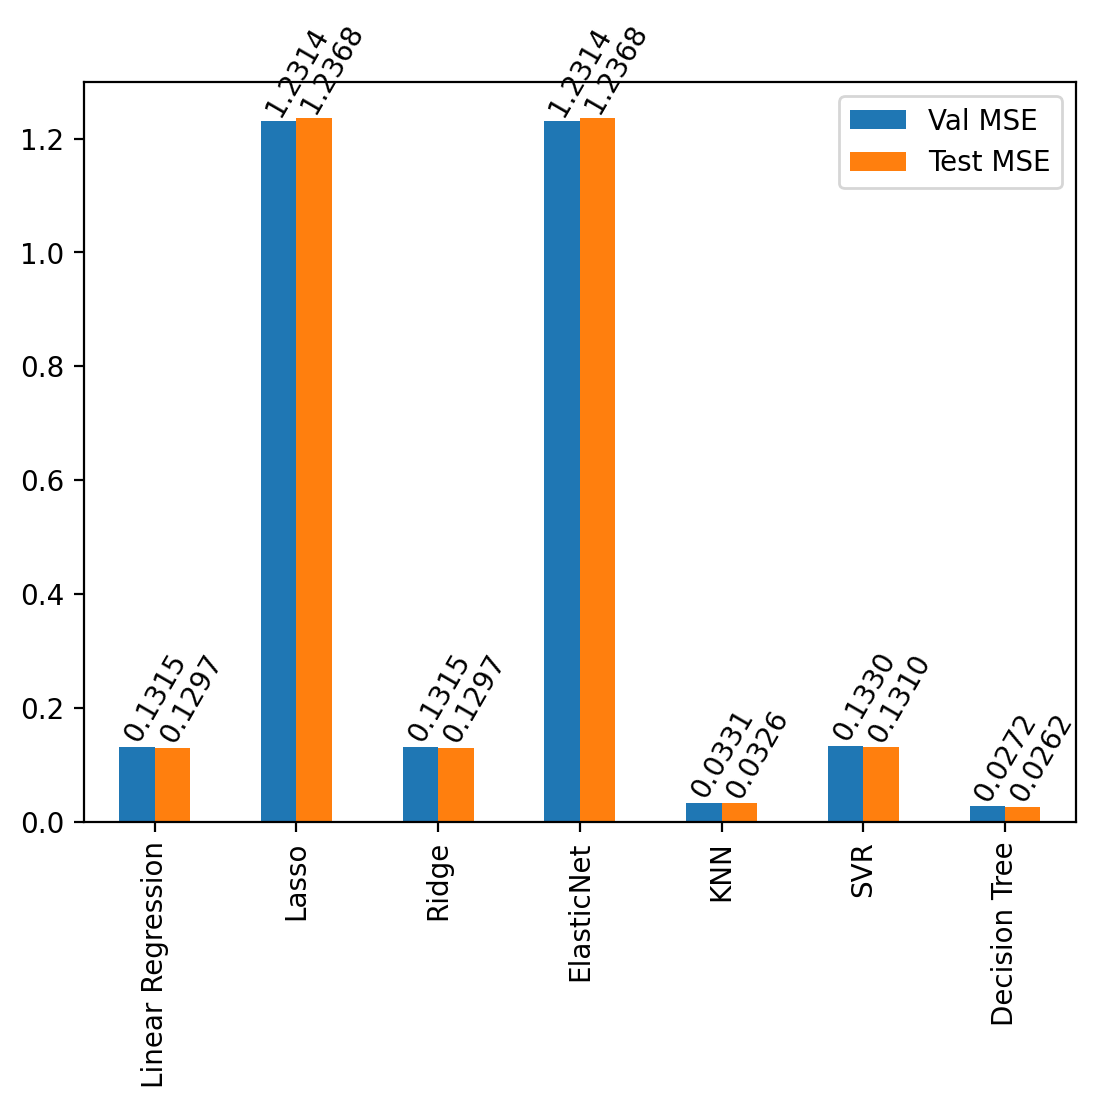

In [98]:
baseline_val_scores_df = pd.DataFrame(
  {
    "Val MSE": baseline_val_scores.values(),
    "Test MSE": baseline_test_scores.values()
  },
  index=baseline_val_scores.keys()
)

ax = baseline_val_scores_df.plot.bar()

for p in ax.patches:
    x = p.get_x()
    y = p.get_height() + 0.01
    label = f"{np.round(p.get_height(), 4):.4f}"

    ax.annotate(label, (x, y), ha='left', rotation=60)

plt.show()

We then took a dictionary of actual test scores, converted it into a DataFrame, transposed it, and then sorted the DataFrame based on the "R2" column in descending order:

In [42]:
pd.DataFrame(baseline_test_scores_actual).T.sort_values(by="R2", ascending=False)

,MAE,MAPE,MSE,RMSE,R2
Decision Tree,1021.222264,0.065686,1.019455e+07,3192.890574,0.980236
KNN,1693.975492,0.101413,1.284254e+07,3583.648746,0.975103
SVR,4653.007943,0.293158,6.035407e+07,7768.788220,0.882995
Linear Regression,4974.824656,0.296780,7.203187e+07,8487.158999,0.860356
Ridge,4975.055073,0.296785,7.203928e+07,8487.595455,0.860342
Lasso,16620.790755,1.143725,6.073659e+08,24644.795409,-0.177464
ElasticNet,16620.790755,1.143725,6.073659e+08,24644.795409,-0.177464


## 5.2 Ensemble Learning

We created three empty dictionaries: `ensemble_val_scores`, `ensemble_test_scores`, and `ensemble_test_scores_actual` for storing and organizing the evaluation scores for different ensemble models.

All the models are trained using the `fit()` method. It is trained on the scaled training data (`X_train_scaled` and `y_train_scaled`). For the Gradient Boosted Trees, such as XGBoost, LightGBM, and CatBoost we applied an early stopping strategy of 25 rounds, which will stop the training if the validation loss doesn't reduce anymore.

After the training phase, we saved the model as a joblib file with compression level 3.

For subsequent runs, the model is loaded from the saved file. The `evaluate()` function took the models and performs evaluation. It returns the validation mean squared error, test mean squared error and actual scores.

In [43]:
ensemble_val_scores = dict()
ensemble_test_scores = dict()
ensemble_test_scores_actual = dict()

### 5.2.1 Random Forest

The line below indicates the training process of a Random Forest model. It initializes a Random Forest regressor with 50 estimators.

In [44]:
# random_forest = RandomForestRegressor(n_estimators=50, n_jobs=-1)
# random_forest.fit(X_train_scaled, y_train_scaled)

# dump(random_forest, "artifacts/random_forest.joblib", compress=3)
random_forest = load("artifacts/random_forest.joblib")

val_mse, test_mse, actual_scores = evaluate(random_forest)

ensemble_val_scores["Random Forest"] = val_mse
ensemble_test_scores["Random Forest"] = test_mse
ensemble_test_scores_actual["Random Forest"] = actual_scores

### 5.2.2 XGBoost

We moved on to the next part, which is the XGBoost technique.

This is where we perform hyperparameter tuning to find the best hyperparameters for XGBoost.

The hyperparameters defined in the `space` dictionary include:
   - `max_depth`: Integer values between 3 and 18 (inclusive).
   - `gamma`: Continuous values between 1 and 9.
   - `reg_alpha`: Integer values between 40 and 180 (inclusive).
   - `reg_lambda`: Continuous values between 0 and 1.
   - `colsample_bytree`: Continuous values between 0.5 and 1.
   - `min_child_weight`: Integer values between 0 and 10 (inclusive).
   - `n_estimators`: Integer values between 100 and 100,000 (inclusive).
   - `seed`: A fixed value of 0.

We created an objective function with the hyperparameters specified in the search space.

Finally, the function returns a dictionary with two keys:
- `'loss'`: The value of the mean squared error.
- `'status'`: A status indicator to show the completion of the evaluation for the given hyperparameters.

In [45]:
space = {
    "max_depth": hp.quniform("max_depth", 3, 18, 1),
    "gamma": hp.uniform ("gamma", 1, 9),
    "reg_alpha": hp.quniform("reg_alpha", 40, 180, 1),
    "reg_lambda": hp.uniform("reg_lambda", 0, 1),
    "colsample_bytree" : hp.uniform("colsample_bytree", 0.5, 1),
    "min_child_weight" : hp.quniform("min_child_weight", 0, 10, 1),
    "n_estimators": hp.quniform("n_estimators", 100, 100000, 1),
    "seed": 0
}

def objective(space):
    model = XGBRegressor(
        early_stopping_rounds=10,
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space["reg_alpha"]),
        reg_lambda=space["reg_lambda"],
        colsample_bytree=space["colsample_bytree"],
        min_child_weight=int(space["min_child_weight"]),
        n_estimators=int(space["n_estimators"])
    )

    model.fit(
        X_train_scaled,
        y_train_scaled,
        eval_set=[(X_val_scaled, y_val_scaled)],
        verbose=False
    )

    y_pred = model.predict(X_val_scaled)
    score = mean_squared_error(y_pred, y_val_scaled)

    return {'loss': score, 'status': STATUS_OK }

We created a container to store the results and information about the optimization process.

We then executed the optimization process by iteratively sampling sets of hyperparameters from the search space, evaluating them using the objective function, and updating the object with the results.

We did 100 evaluations during the optimization process. The algorithm used for the optimization process is `tpe.suggest`, which represents the Tree Parzen Estimator algorithm, a popular choice for Bayesian optimization.

After the optimization process, we saved the best set of hyperparameters which minimizes the loss function (mean squared error in this case) in a variable.

In [46]:
trials = Trials()

# best_hyperparams = fmin(
#     fn=objective,
#     space=space,
#     algo=tpe.suggest,
#     max_evals=100,
#     trials=trials
# )

We created a dictionary to persist the best set of hyperparameters from the optimization process we did above.

However, the hyperparameters are commented out, and instead, default values or other specified values are used here. The model can reach minimum loss with lesser iterations by using the default hyperparameters.

In [47]:
xgb_params = {
    "colsample_bytree": 0.8545834573974018,
    "gamma": 1.0149990564873104,
    "max_depth": 17,
    "min_child_weight": 8.0,
    "n_estimators": 5149,
    "reg_alpha": 40.0,
    "reg_lambda": 0.0008085443779402013
}

# xgb = XGBRegressor(
#     # **xgb_params,
#     n_estimators=10000,
#     early_stopping_rounds=25,
#     n_jobs=-1
# )

# xgb.fit(
#   X_train_scaled,
#   y_train_scaled,
#   eval_set=[(X_val_scaled, y_val_scaled)],
#   verbose=250
# )

# dump(xgb, "artifacts/xgboost.joblib", compress=3)
xgb = load("artifacts/xgboost.joblib")

val_mse, test_mse, actual_scores = evaluate(xgb)

ensemble_val_scores["XGBoost"] = val_mse
ensemble_test_scores["XGBoost"] = test_mse
ensemble_test_scores_actual["XGBoost"] = actual_scores

Then, we did the calculation and visualization of feature importance for an XGBoost model using a horizontal bar chart.

We can see the "flight" feature is the most important feature among all the features we have here based on the number of times each feature is used in the tree ensemble.

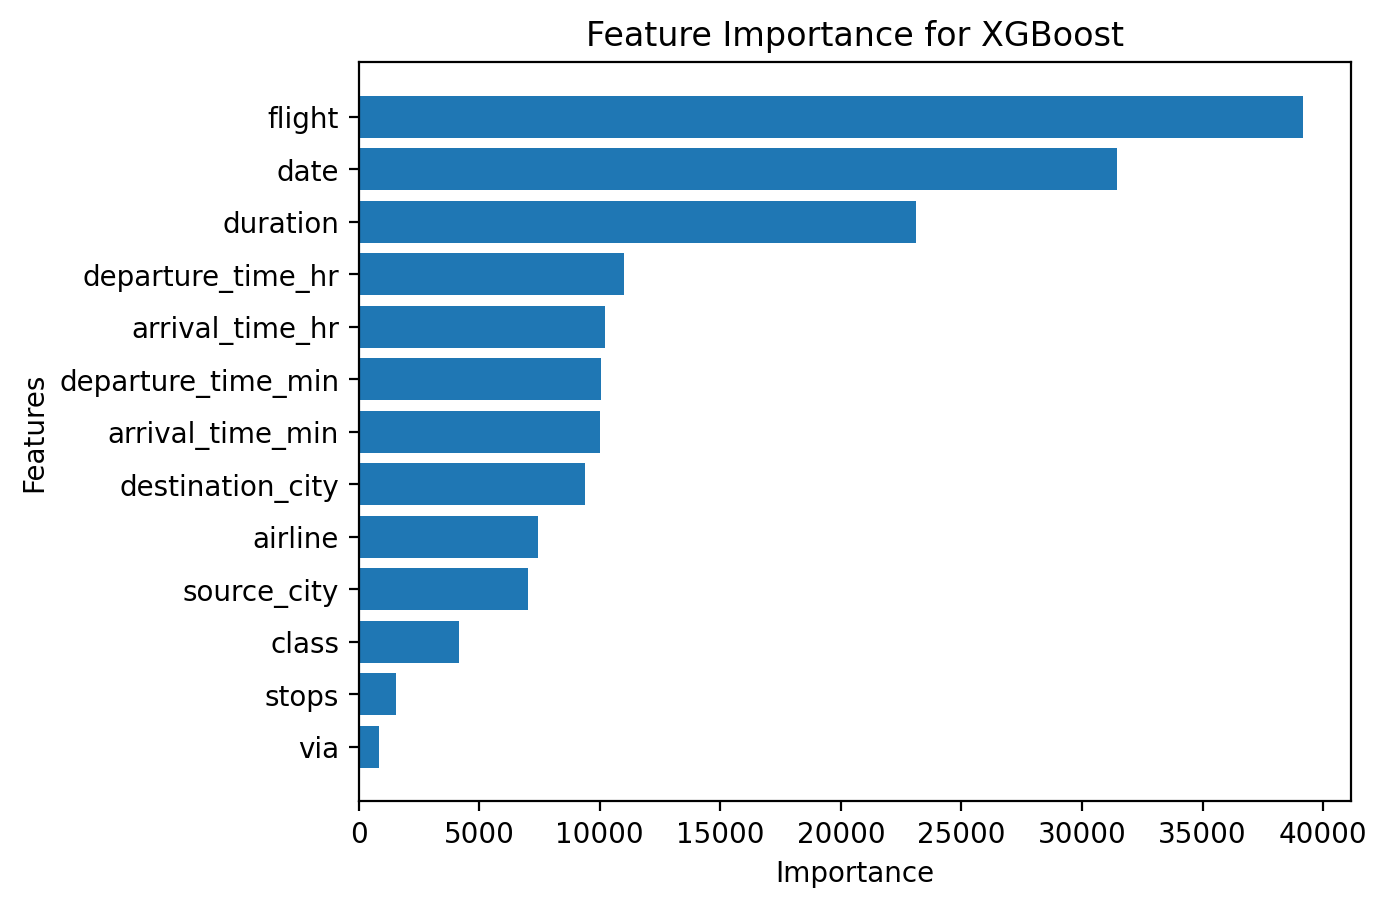

In [84]:
xgb_importance = xgb.get_booster().get_score(importance_type='weight')
xgb_importance_named = dict()

for i, weight in xgb_importance.items():
  xgb_importance_named[features[int(i[1:])]] = weight

xgb_importance_named = dict(sorted(xgb_importance_named.items(), key=lambda item: item[1]))

plt.barh(list(xgb_importance_named.keys()), xgb_importance_named.values())
plt.title("Feature Importance for XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### 5.2.3 LightGBM

The code below is for the usage of a LightGBM regressor model for training, evaluation, and storing the results.

We are using the default hyperparameters for this model. The evaluation results are logged every 500 iterations during the training process.

In [49]:
# lgb = LGBMRegressor(n_estimators=10000, early_stopping_round=25)

# lgb.fit(
#   X_train_scaled,
#   y_train_scaled,
#   eval_set=(X_val_scaled, y_val_scaled),
#   callbacks=[log_evaluation(period=500)]
# )

# dump(lgb, "artifacts/lightgbm.joblib", compress=3)
lgb = load("artifacts/lightgbm.joblib")

val_mse, test_mse, actual_scores = evaluate(lgb)

ensemble_val_scores["LightGBM"] = val_mse
ensemble_test_scores["LightGBM"] = test_mse
ensemble_test_scores_actual["LightGBM"] = actual_scores

As you can see below, this is where we do the calculation and visualization of feature importance for a LightGBM model using a horizontal bar chart.

As per what we see in the XGBoost chart, the "flight" feature is the most important feature among all the features we have here based on the number of times each feature is used in the tree ensemble.

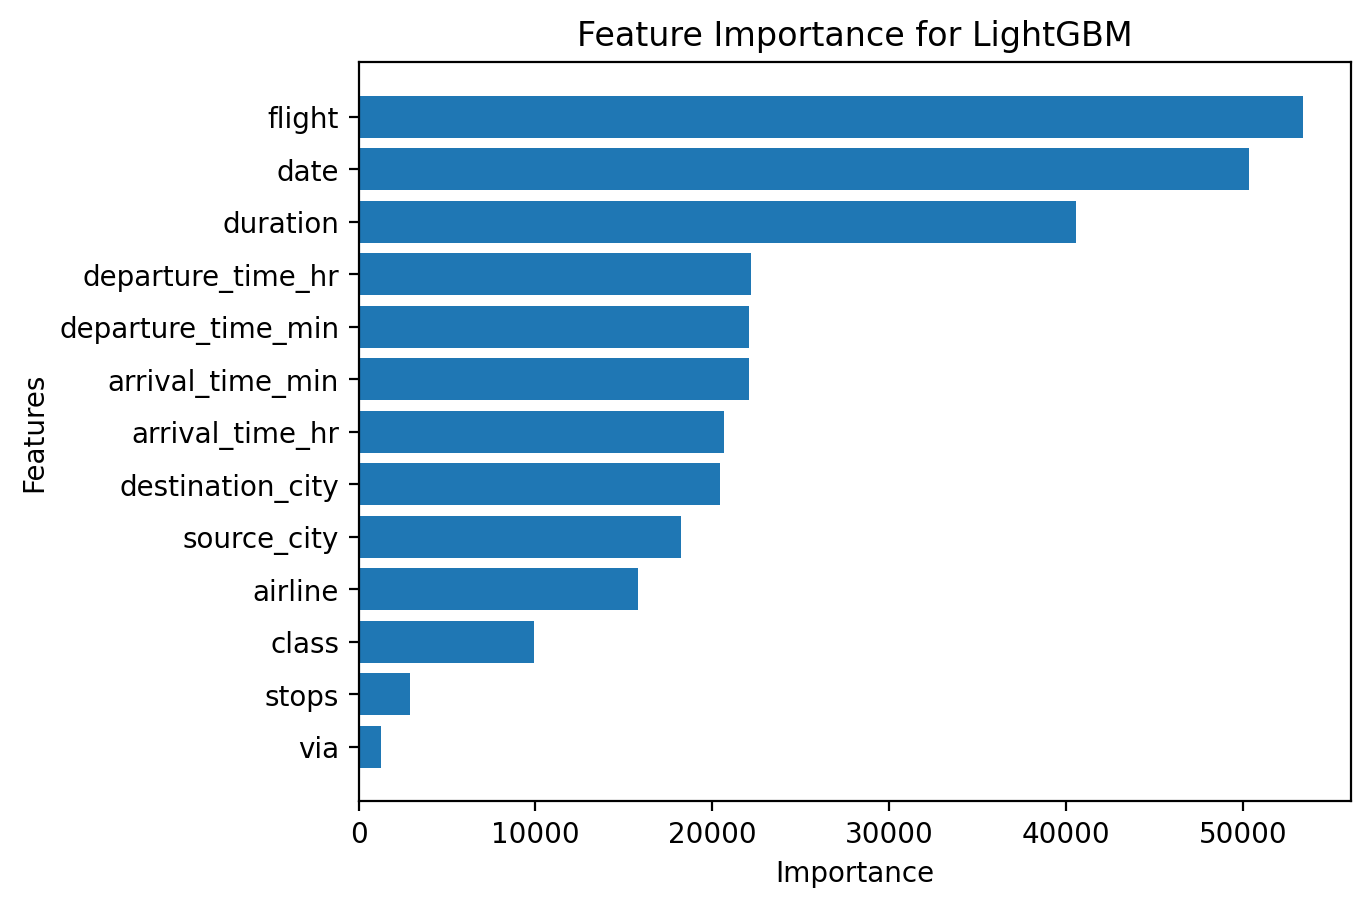

In [85]:
lgb_importance_named = dict()

for i, weight in enumerate(lgb.feature_importances_):
  if weight == 0:
    continue

  lgb_importance_named[features[i]] = weight

lgb_importance_named = dict(sorted(lgb_importance_named.items(), key=lambda item: item[1]))

plt.barh(list(lgb_importance_named.keys()), lgb_importance_named.values())
plt.title("Feature Importance for LightGBM")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### 5.2.4 CatBoost

Following that, we also used the CatBoost regressor model.

We are using the default hyperparameters for this model. The evaluation results are logged every 500 iterations during the training process.

In [51]:
# catb = CatBoostRegressor(n_estimators=10000, early_stopping_rounds=25)

# catb.fit(
#   X_train_scaled,
#   y_train_scaled,
#   eval_set=(X_val_scaled, y_val_scaled),
#   metric_period=500
# )

# dump(catb, "artifacts/catboost.joblib", compress=3)
catb = load("artifacts/catboost.joblib")

val_mse, test_mse, actual_scores = evaluate(catb)

ensemble_val_scores["CatBoost"] = val_mse
ensemble_test_scores["CatBoost"] = test_mse
ensemble_test_scores_actual["CatBoost"] = actual_scores

We used a horizontal bar chart for the visualization of the Feature Importance of CatBoost.

We can see that class is the feature that would influence the target variable significantly. For example, when a customer decides to buy a Business class ticket instead of an Economy class ticket, the price would change dramatically from thousands to tens of thousands.

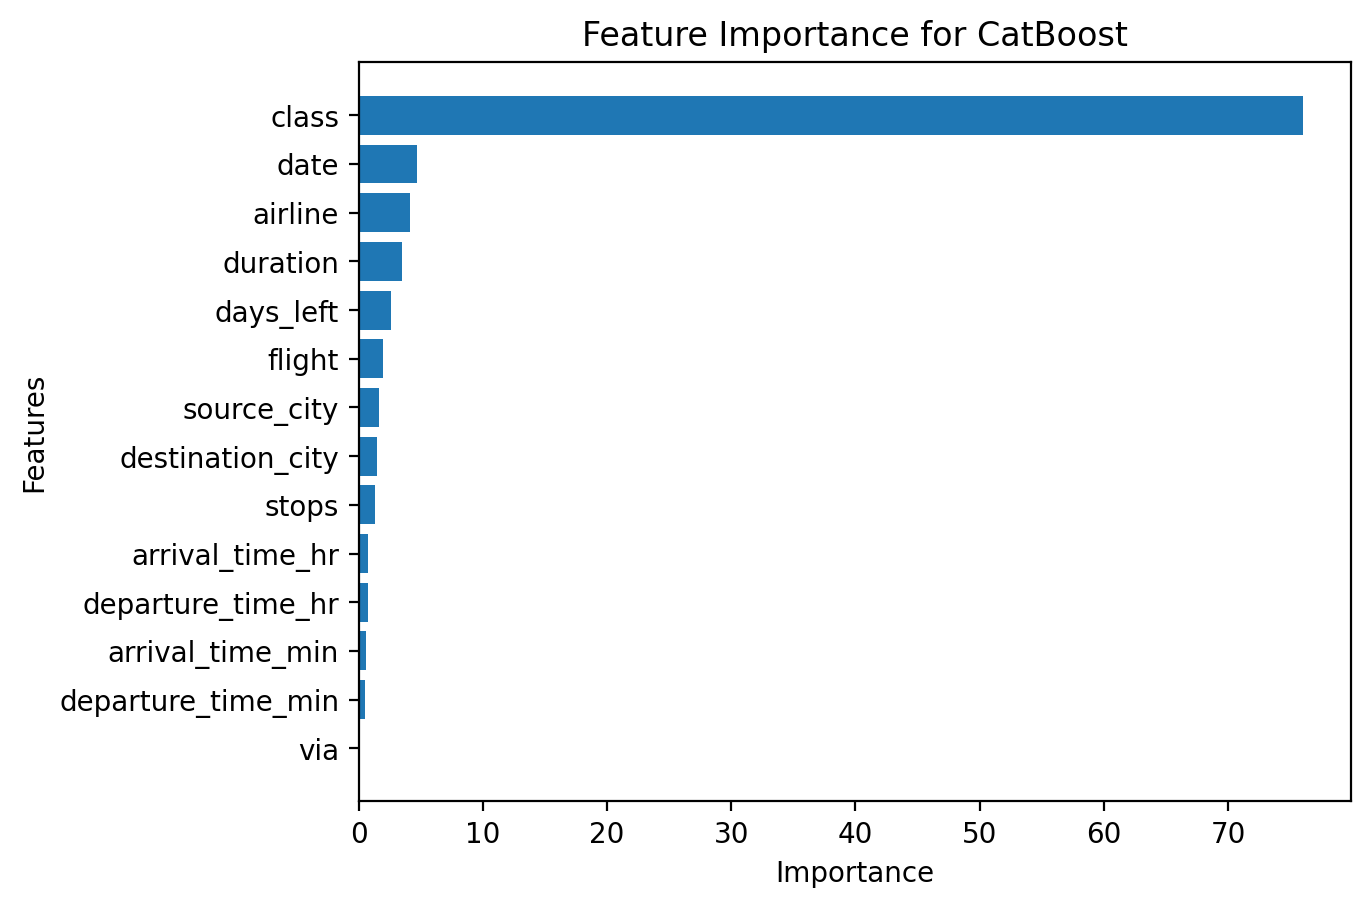

In [86]:
catb_importance_named = dict()

for i, weight in enumerate(catb.feature_importances_):
  catb_importance_named[features[i]] = weight

catb_importance_named = dict(sorted(catb_importance_named.items(), key=lambda item: item[1]))

plt.barh(list(catb_importance_named.keys()), catb_importance_named.values())
plt.title("Feature Importance for CatBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### 5.2.5 Summary

We created a DataFrame named `ensemble_val_scores_df` that is constructed from two dictionaries: `ensemble_val_scores` and `ensemble_test_scores`containing the validation mean squared error (MSE) scores and test MSE scores, respectively.

The `index` parameter is set to `ensemble_val_scores.keys()`, which assigns the keys from the `ensemble_val_scores` dictionary as the index for the DataFrame.

Next, the bar plot is created and assigned to the variable `ax`. The `label` variable is formatted using f-strings to round the height value to four decimal places . The `ax.annotate()` function is used to annotate the bar. It takes the label, coordinates `(x, y)`, horizontal alignment (`ha`), and rotation angle as arguments. The `rotation=60` argument rotates the annotation text by 60 degrees for better visibility if the x-axis labels are long.

As for the result, we can see that CatBoost has the highest MSE for validation set, which indicates that the predictions made by that model have a larger average squared difference from the actual values. In other words, the model's predictions are less accurate, and there is a greater deviation between the predicted values and the true values.

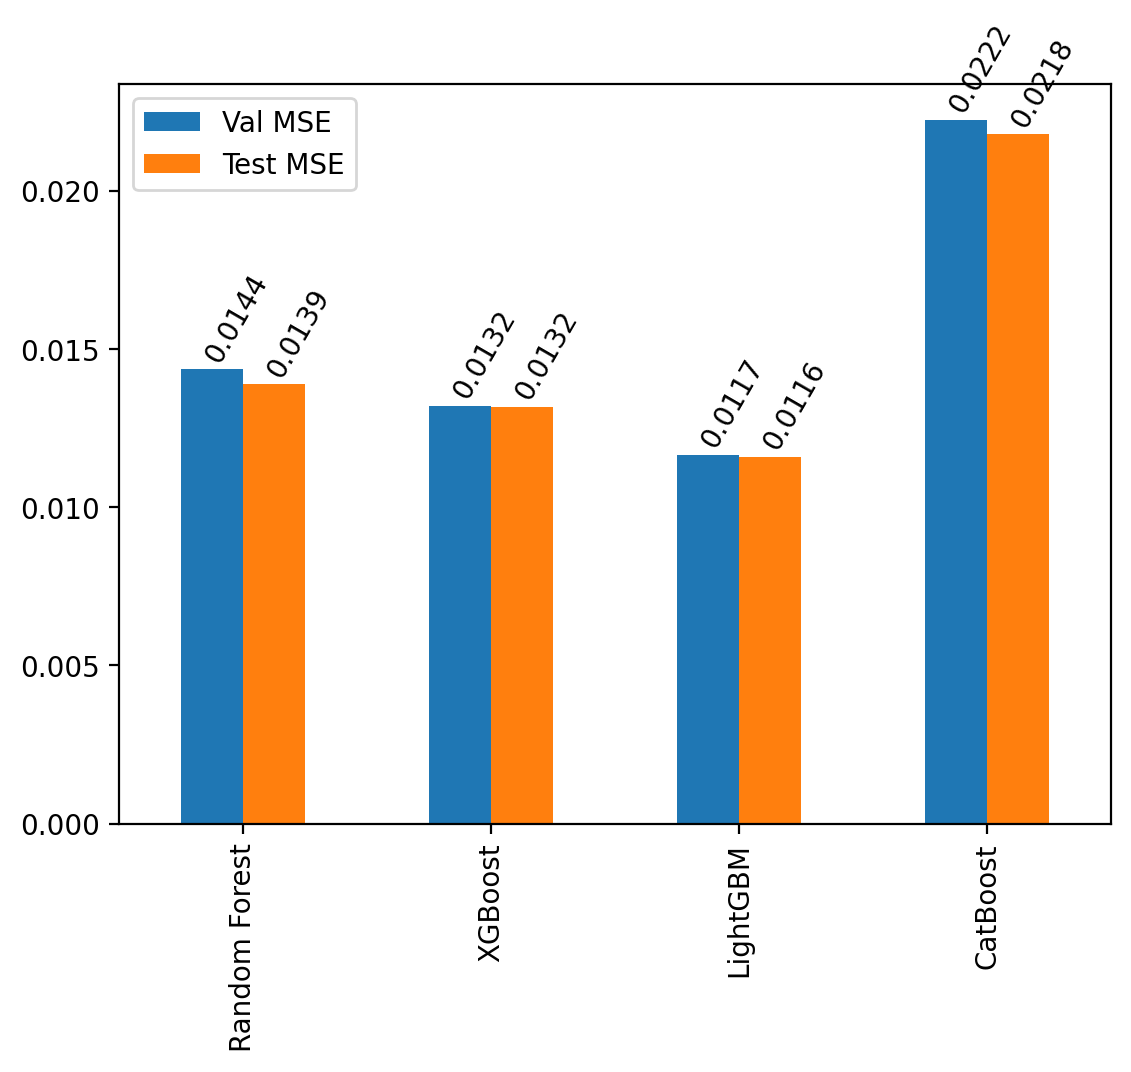

In [53]:
ensemble_val_scores_df = pd.DataFrame(
  {
    "Val MSE": ensemble_val_scores.values(),
    "Test MSE": ensemble_test_scores.values()
  },
  index=ensemble_val_scores.keys()
)

ax = ensemble_val_scores_df.plot.bar()

for p in ax.patches:
    x = p.get_x() + 0.075
    y = p.get_height() + 0.00025
    label = f"{np.round(p.get_height(), 4):.4f}"

    ax.annotate(label, (x, y), ha='left', rotation=60)

plt.show()

This DataFrame provides a summary of the actual test scores sorted by their R2 values for all the ensemble models. From here, we can see LightGBM is sitting at the top of the list which indicates a large proportion of the variance in the dependent variable is explained by the model, indicating a better fit.

In [54]:
pd.DataFrame(ensemble_test_scores_actual).T.sort_values(by="R2", ascending=False)

,MAE,MAPE,MSE,RMSE,R2
LightGBM,1100.505688,0.063353,5.464240e+06,2337.571338,0.989407
Random Forest,911.605260,0.055574,5.678545e+06,2382.969854,0.988991
XGBoost,1332.308566,0.071642,7.341683e+06,2709.554044,0.985767
CatBoost,1628.197785,0.098433,9.846716e+06,3137.947702,0.980911


## 5.3 Neural Networks

Neural networks, also known as artificial neural networks or simply "neural nets," are a type of computational model inspired by the structure and function of biological neural networks in the human brain.

At a high level, a neural network consists of interconnected artificial neurons, also known as nodes or units, organized in layers. The nodes are arranged in a series of input, hidden, and output layers. The connections between nodes, often represented by weighted edges, allow information to flow between them. Each node applies an activation function to the weighted sum of its inputs, transforming it into an output signal that is passed to the next layer.

Three dictionaries are created named 'nn_val_scores', 'nn_test_scores' and 'nn_test_scores_actual'. These dictionaries are intended to store scores or results of some evaluation or testing process related to a neural network (NN).

In [55]:
nn_val_scores = dict()
nn_test_scores = dict()
nn_test_scores_actual = dict()

### 5.3.1 MLP 256

This section represents the construction and compilation of a multilayer perceptron (MLP) neural network using the Keras API with a TensorFlow backend.

We define a neural network model with one input layer, two hidden layers, and one output layer using Keras API in TensorFlow. The input layer has 14 neurons, the first hidden layer has 256 neurons with a ReLU activation function, and the second hidden layer is a dropout layer that randomly drops out 20% of the neurons. The output layer has a single neuron and is used for regression problems. The optimizer used is Adam with a learning rate of 0.001. The model is compiled with a mean squared error loss function.

In [56]:
mlp_256 = Sequential()

mlp_256.add(Input(shape=(14,)))

mlp_256.add(Dense(256, activation="relu"))
mlp_256.add(Dropout(0.2))

mlp_256.add(Dense(1))

opt = Adam(learning_rate=0.001)
mlp_256.compile(loss="mean_squared_error", optimizer=opt)

This creates an instance of the `EarlyStopping` callback in Keras. The callback monitors the validation loss during the training process and stops training if the validation loss does not improve for 25 epochs. The weights from the epoch with the lowest validation loss are restored before the model is returned to ensure that the best performing model is returned, even if training is stopped early. This is useful for preventing overfitting and improving the efficiency of the training process.

In [57]:
es = EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True)

# mlp_256_hist = mlp_256.fit(
#   X_train_scaled,
#   y_train_scaled,
#   validation_data=(X_val_scaled, y_val_scaled),
#   epochs=10000,
#   batch_size=32,
#   callbacks=[es]
# )

# mlp_256.save("artifacts/mlp_256.h5")

# with open('logs/mlp_256.json', "w") as f:
#     f.write(json.dumps(mlp_256_hist.history))

This section loads a pre-trained neural network model `mlp_256` from the file `"artifacts/mlp_256.h5"` using the Keras `load_model` function.

Then, the `evaluate` function is called with `mlp_256` as input to evaluate the model on validation and test sets. The function returns the mean squared error (MSE) scores for the validation and test sets, as well as the actual scores predicted by the model on the test set.

Finally, the MSE scores and actual scores are added to the `nn_val_scores`, `nn_test_scores`, and `nn_test_scores_actual` dictionaries with the model name `"MLP 256"` as the key. These dictionaries are used to store the performance metrics of different models and will be used later for comparison and analysis.


In [58]:
mlp_256 = keras.models.load_model("artifacts/mlp_256.h5")

val_mse, test_mse, actual_scores = evaluate(mlp_256)

nn_val_scores["MLP 256"] = val_mse
nn_test_scores["MLP 256"] = test_mse
nn_test_scores_actual["MLP 256"] = actual_scores

2346/2346 [==============================] - 2s 1ms/step


This section reads the training history of a neural network model from a JSON file `"logs/mlp_256.json"` using the `json` library. The training history contains information about the training and validation loss of the model at each epoch.

This plot can be useful to understand how the model is learning over time and to identify any issues such as overfitting or underfitting. The graph shows the training loss decreases while the validation loss stays constant indicating overfitting.

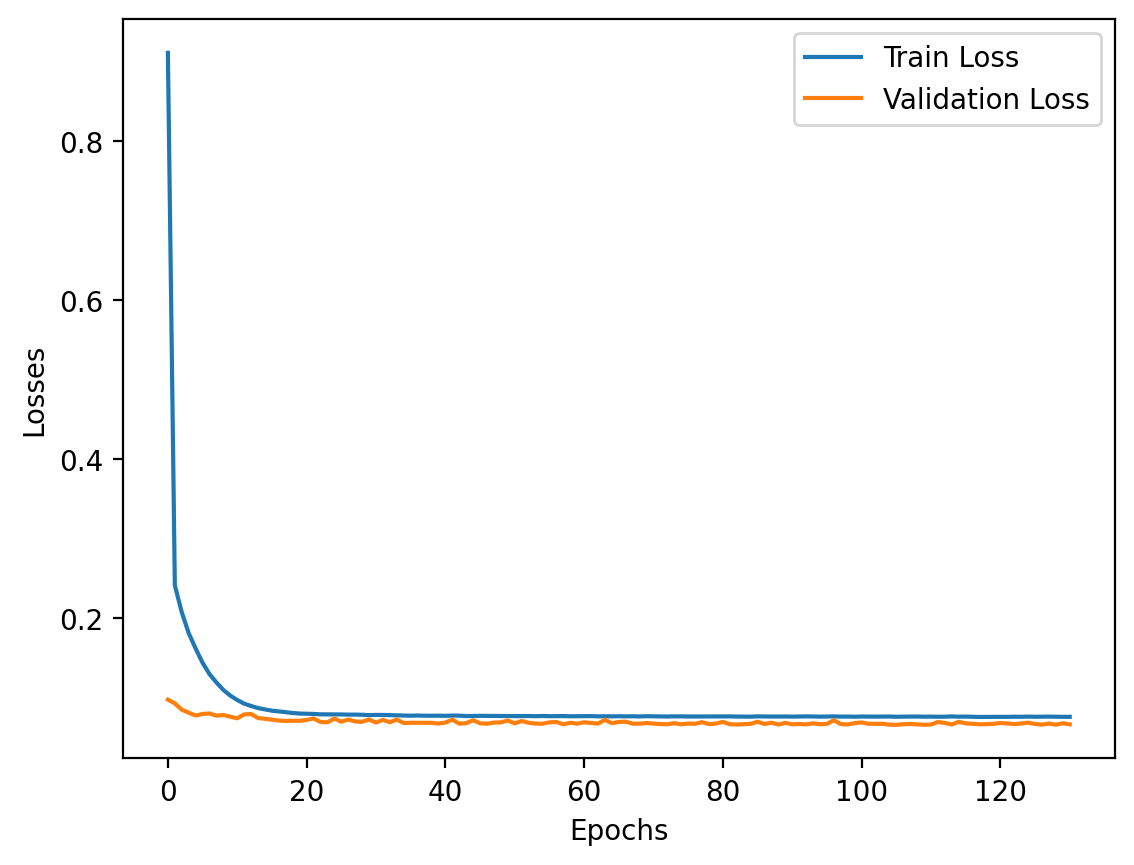

In [91]:
with open("logs/mlp_256.json", "r") as f:
  mlp_256_hist = json.loads(f.read())

plt.plot(mlp_256_hist["loss"])
plt.plot(mlp_256_hist["val_loss"])

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend(["Train Loss", "Validation Loss"])

plt.show()

### 5.3.2 MLP 128x64x32

We define a Multilayer Perceptron (MLP) neural network model using the Keras library with TensorFlow backend.

The mlp_128_64_32 model is created as a sequential model using Sequential(). Sequential models in Keras allow you to define neural network architectures layer by layer.

The model starts with an input layer (Input(shape=(14,))) that specifies the shape of the input data. In this case, the input data is expected to have 14 features.

Next, three fully connected hidden layers are added to the model using Dense():
The first hidden layer has 128 units and uses the ReLU activation function.
The second hidden layer has 64 units and also uses the ReLU activation function.
The third hidden layer has 32 units and uses the ReLU activation function.
Dropout layers (Dropout(0.2)) are inserted after each hidden layer to mitigate overfitting. Dropout randomly sets a fraction of input units to 0 during training.

The final layer added to the model is the output layer (Dense(1)) with a single unit. Since it is a regression task (mean squared error loss function), the output layer does not use an activation function.

The model is compiled using the Adam optimizer (Adam(learning_rate=0.001)). Adam is an optimization algorithm commonly used for training neural networks.
The mean squared error (loss="mean_squared_error") is used as the loss function. It measures the average squared difference between the predicted and actual values.

In [60]:
mlp_128_64_32 = Sequential()

mlp_128_64_32.add(Input(shape=(14,)))

mlp_128_64_32.add(Dense(128, activation="relu"))
mlp_128_64_32.add(Dropout(0.2))

mlp_128_64_32.add(Dense(64, activation="relu"))
mlp_128_64_32.add(Dropout(0.2))

mlp_128_64_32.add(Dense(32, activation="relu"))
mlp_128_64_32.add(Dropout(0.2))

mlp_128_64_32.add(Dense(1))

opt = Adam(learning_rate=0.001)
mlp_128_64_32.compile(loss="mean_squared_error", optimizer=opt)

In [61]:
es = EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True)

# mlp_128_64_32_hist = mlp_128_64_32.fit(
#   X_train_scaled,
#   y_train_scaled,
#   validation_data=(X_val_scaled, y_val_scaled),
#   epochs=10000,
#   batch_size=32,
#   callbacks=[es]
# )

# mlp_128_64_32.save("artifacts/mlp_128_64_32.h5")

# with open('logs/mlp_128_64_32.json', "w") as f:
#     f.write(json.dumps(mlp_128_64_32_hist.history))

In [62]:
mlp_128_64_32 = keras.models.load_model("artifacts/mlp_128_64_32.h5")

val_mse, test_mse, actual_scores = evaluate(mlp_128_64_32)

nn_val_scores["MLP 128x64x32"] = val_mse
nn_test_scores["MLP 128x64x32"] = test_mse
nn_test_scores_actual["MLP 128x64x32"] = actual_scores

2346/2346 [==============================] - 3s 1ms/step


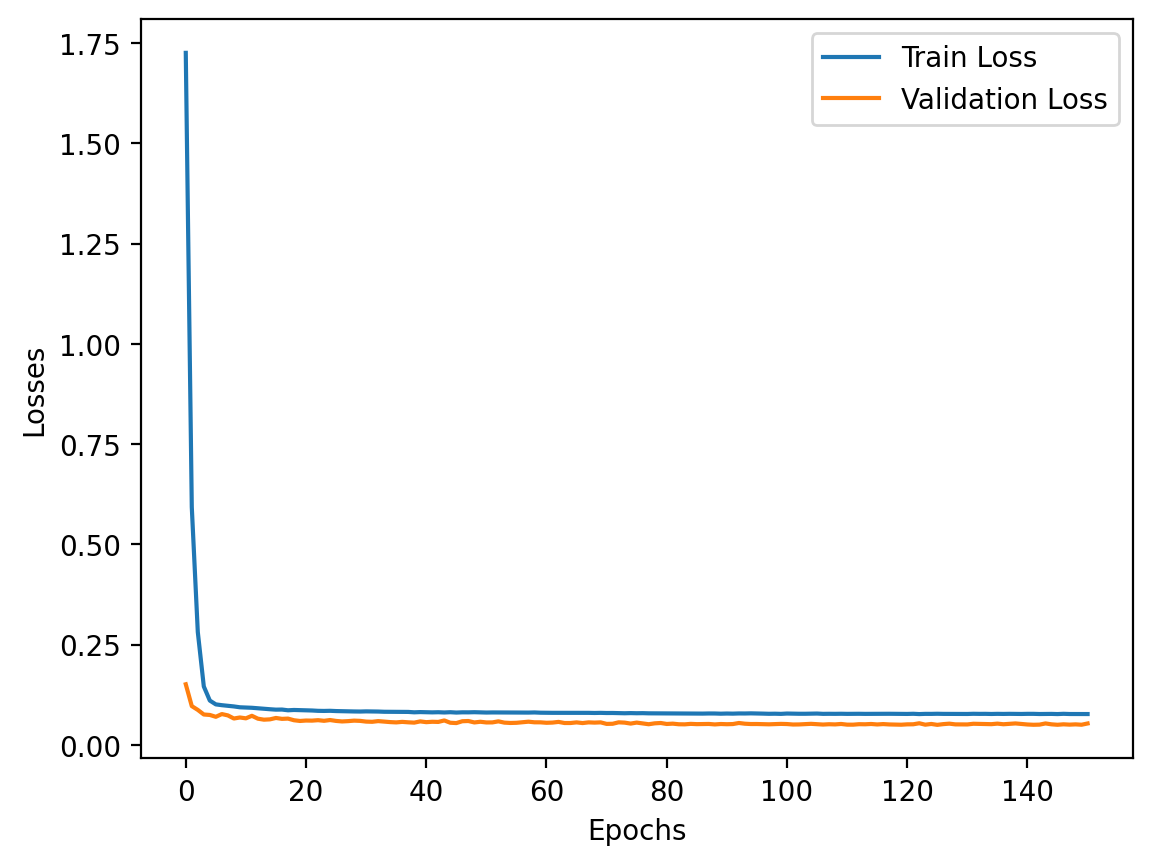

In [90]:
with open("logs/mlp_128_64_32.json", "r") as f:
  mlp_128_64_32_hist = json.loads(f.read())

plt.plot(mlp_128_64_32_hist["loss"])
plt.plot(mlp_128_64_32_hist["val_loss"])

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend(["Train Loss", "Validation Loss"])

plt.show()

### 5.3.3 MLP 256x128x64

In [64]:
mlp_256_128_64 = Sequential()

mlp_256_128_64.add(Input(shape=(14,)))

mlp_256_128_64.add(Dense(256, activation="relu"))
mlp_256_128_64.add(Dropout(0.2))

mlp_256_128_64.add(Dense(128, activation="relu"))
mlp_256_128_64.add(Dropout(0.2))

mlp_256_128_64.add(Dense(64, activation="relu"))
mlp_256_128_64.add(Dropout(0.2))

mlp_256_128_64.add(Dense(1))

opt = Adam(learning_rate=0.001)
mlp_256_128_64.compile(loss="mean_squared_error", optimizer=opt)

In [65]:
es = EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True)

# mlp_256_128_64_hist = mlp_256_128_64.fit(
#   X_train_scaled,
#   y_train_scaled,
#   validation_data=(X_val_scaled, y_val_scaled),
#   epochs=10000,
#   batch_size=32,
#   callbacks=[es]
# )

# mlp_256_128_64.save("artifacts/mlp_256_128_64.h5")

# with open('logs/mlp_256_128_64.json', "w") as f:
#     f.write(json.dumps(mlp_256_128_64_hist.history))

In [66]:
mlp_256_128_64 = keras.models.load_model("artifacts/mlp_256_128_64.h5")

val_mse, test_mse, actual_scores = evaluate(mlp_256_128_64)

nn_val_scores["MLP 256x128x64"] = val_mse
nn_test_scores["MLP 256x128x64"] = test_mse
nn_test_scores_actual["MLP 256x128x64"] = actual_scores

2346/2346 [==============================] - 3s 1ms/step


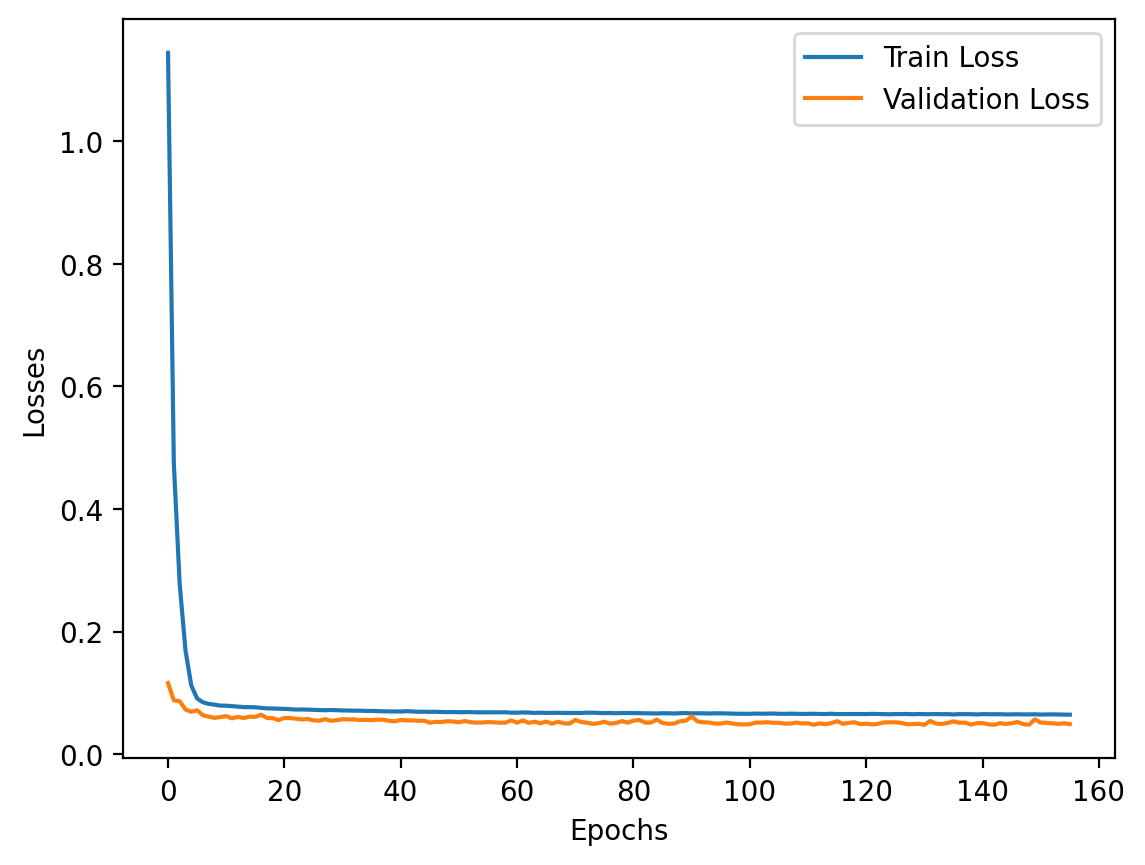

In [88]:
with open("logs/mlp_256_128_64.json", "r") as f:
  mlp_256_128_64_hist = json.loads(f.read())

plt.plot(mlp_256_128_64_hist["loss"])
plt.plot(mlp_256_128_64_hist["val_loss"])

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend(["Train Loss", "Validation Loss"])

plt.show()

### 5.3.4 MLP 1024x512x256

In [68]:
mlp_1024_512_256 = Sequential()

mlp_1024_512_256.add(Input(shape=(14,)))

mlp_1024_512_256.add(Dense(1024, activation="relu"))
mlp_1024_512_256.add(Dropout(0.2))

mlp_1024_512_256.add(Dense(512, activation="relu"))
mlp_1024_512_256.add(Dropout(0.2))

mlp_1024_512_256.add(Dense(256, activation="relu"))
mlp_1024_512_256.add(Dropout(0.2))

mlp_1024_512_256.add(Dense(1))

opt = Adam(learning_rate=0.001)
mlp_1024_512_256.compile(loss="mean_squared_error", optimizer=opt)

In [69]:
es = EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True)

# mlp_1024_512_256_hist = mlp_1024_512_256.fit(
#   X_train_scaled,
#   y_train_scaled,
#   validation_data=(X_val_scaled, y_val_scaled),
#   epochs=10000,
#   batch_size=32,
#   callbacks=[es]
# )

# mlp_1024_512_256.save("artifacts/mlp_1024_512_256.h5")

# with open('logs/mlp_1024_512_256.json', "w") as f:
#     f.write(json.dumps(mlp_1024_512_256_hist.history))

In [70]:
mlp_1024_512_256 = keras.models.load_model("artifacts/mlp_1024_512_256.h5")

val_mse, test_mse, actual_scores = evaluate(mlp_1024_512_256)

nn_val_scores["MLP 1024x512x256"] = val_mse
nn_test_scores["MLP 1024x512x256"] = test_mse
nn_test_scores_actual["MLP 1024x512x256"] = actual_scores

2346/2346 [==============================] - 6s 2ms/step


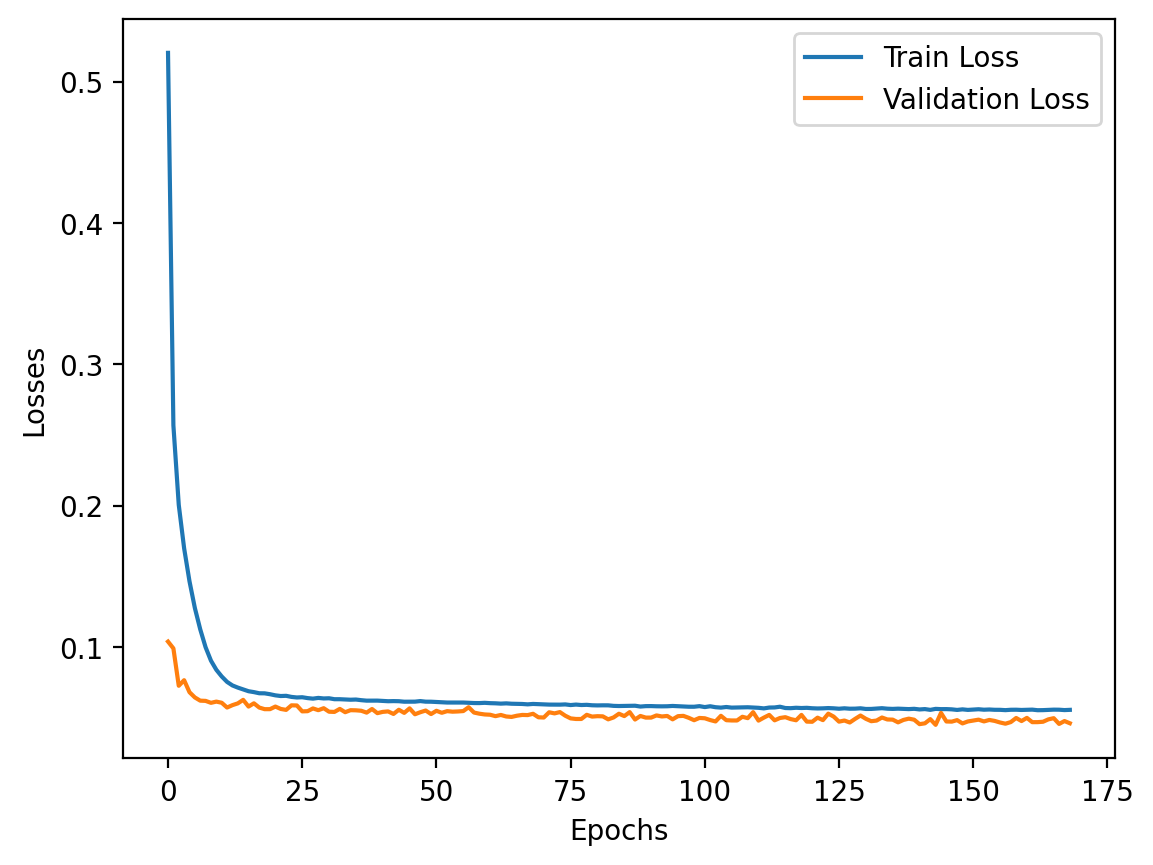

In [89]:
with open("logs/mlp_1024_512_256.json", "r") as f:
  mlp_1024_512_256_hist = json.loads(f.read())

plt.plot(mlp_1024_512_256_hist["loss"])
plt.plot(mlp_1024_512_256_hist["val_loss"])

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend(["Train Loss", "Validation Loss"])

plt.show()

### 5.3.5 Summary

This section creates a DataFrame to store MSE scores, generates a bar plot to compare the scores, adds annotations to display the exact values on top of each bar, and finally shows the plot. The purpose is to visualize and compare the performance of different neural network models based on their validation and test MSE scores.

We can infer following based on the generated visualization:

**Model Comparison:** The bar plot enables a visual comparison of the validation and test MSE scores for different neural network models. We can observe the relative performance of each model based on their MSE scores. Models with lower MSE scores generally indicate better predictive performance.

**Overfitting Evaluation:** By comparing the validation MSE scores with the test MSE scores, we can assess whether the models suffer from overfitting. If a model has significantly lower validation MSE than the test MSE, it suggests that the model may be overfitting the training data and not generalizing well to unseen data.

**Model Selection:** The visualization assists in model selection by providing a concise summary of the MSE scores for each model. It helps in identifying the models that perform better on both the validation and test datasets, thereby guiding the decision-making process.

**Fine-tuning and Improvement:** The visualization highlights the performance gaps between different models. It can serve as a starting point for further investigation and improvement of underperforming models. By analyzing the MSE scores, one can identify models that require further fine-tuning or exploration of alternative architectures.

**Communication and Reporting:** The visualization is a useful tool for communicating the performance of neural network models to stakeholders or presenting results in research papers or reports. The annotated MSE scores on top of each bar provide clear and concise information for easy understanding and interpretation.

In summary, the generated visualization and accompanying MSE scores offer valuable insights into the relative performance of neural network models, their potential for overfitting, and aid in the selection and improvement of models. The visualization serves as a concise summary that can be effectively used for communication and reporting purposes.

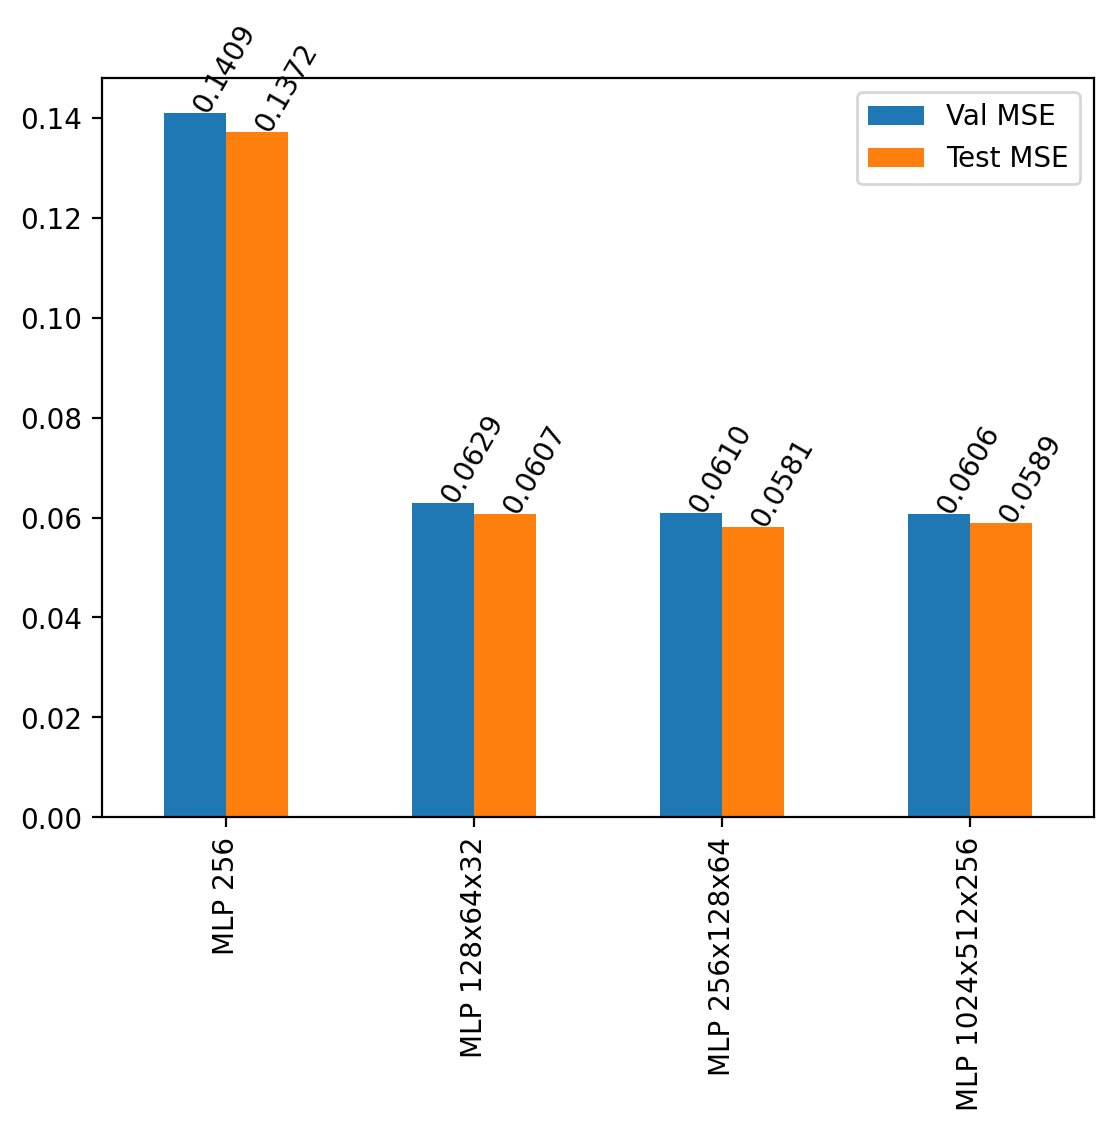

In [72]:
nn_val_scores_df = pd.DataFrame(
  {
    "Val MSE": nn_val_scores.values(),
    "Test MSE": nn_test_scores.values()
  },
  index=nn_val_scores.keys()
)

ax = nn_val_scores_df.plot.bar()

for p in ax.patches:
    x = p.get_x() + 0.1
    y = p.get_height() + 0.00025
    label = f"{np.round(p.get_height(), 4):.4f}"

    ax.annotate(label, (x, y), ha='left', rotation=60)

plt.show()

This generates a summary DataFrame that allows for easy comparison of neural network models based on their R2 scores on the test dataset. The DataFrame provides an overview of the models' performance and helps identify models with higher R2 scores, indicating better predictive accuracy.

In [73]:
pd.DataFrame(nn_test_scores_actual).T.sort_values(by="R2", ascending=False)

,MAE,MAPE,MSE,RMSE,R2
MLP 256x128x64,2668.290067,0.167794,2.264672e+07,4758.857342,0.956096
MLP 128x64x32,2727.796221,0.174643,2.304899e+07,4800.936074,0.955316
MLP 1024x512x256,2730.712161,0.170084,2.415299e+07,4914.569060,0.953176
MLP 256,3157.997037,0.222839,2.779150e+07,5271.764813,0.946122


# 6. Evaluation

This code section applies the inverse transformation to the predictions made by a LightGBM model and creates a pandas Series from the predictions.

 We apply the lgb model to generate predictions for the test dataset. It then transforms the predictions using np.expm1() to obtain the original scale of the predictions. Finally, the transformed predictions are stored in a pandas Series object named y_pred_series with the corresponding index values from the test dataset. This Series can be used for further analysis or evaluation

In [74]:
y_pred = np.expm1(lgb.predict(X_test_scaled))
y_pred_series = pd.Series(y_pred, index=X_test.index, name="predicted_price")

This section combines the features of the test dataset, the actual target variable, and the predicted target variable into a single DataFrame named predicted_df.

It then calculates the deviation between the predicted price and the actual price for each data point.

Finally, a subset of columns from predicted_df is selected and displayed, showing the categorical features, numerical features, actual price, and predicted price for the first few rows of the DataFrame.

In [96]:
predicted_df = pd.concat([X_test, y_test, y_pred_series], axis=1)
predicted_df["deviation"] = predicted_df["predicted_price"] - predicted_df["price"]
predicted_df[categorical_features + numerical_features + ["price", "predicted_price", "deviation"]].head()

,date,airline,flight,source_city,destination_city,stops,via,class,days_left,departure_time_hr,departure_time_min,arrival_time_hr,arrival_time_min,duration,price,predicted_price,deviation
80343,2022-03-05,Indigo,UK-825,Mumbai,Chennai,1-stop,UNK,Economy,23,16,55,21,40,285.0,6556,6862.892830,306.892830
54405,2022-02-21,Air India,AI-864,Mumbai,Bangalore,1-stop,IXU,Economy,11,15,35,8,55,1040.0,9201,9145.679063,-55.320937
193431,2022-03-27,Vistara,UK-832,Chennai,Mumbai,1-stop,UNK,Economy,45,7,5,17,40,635.0,4637,4831.069302,194.069302
108624,2022-03-24,Air India,G8-395,Bangalore,Kolkata,1-stop,UNK,Economy,42,6,10,14,30,500.0,6583,6700.177533,117.177533
35005,2022-03-29,Vistara,UK-981,Delhi,Hyderabad,1-stop,UNK,Economy,47,20,40,12,15,935.0,5549,5514.430048,-34.569952


We are calculating the average actual prices and predicted prices based on the number of days left and creates a line plot to compare them. The plot helps to visualize the trend and relationship between the average prices and the number of days left.

The graph shows that the flight ticket price decreases with increase in the no of days left and the actual price matches the predicted price.

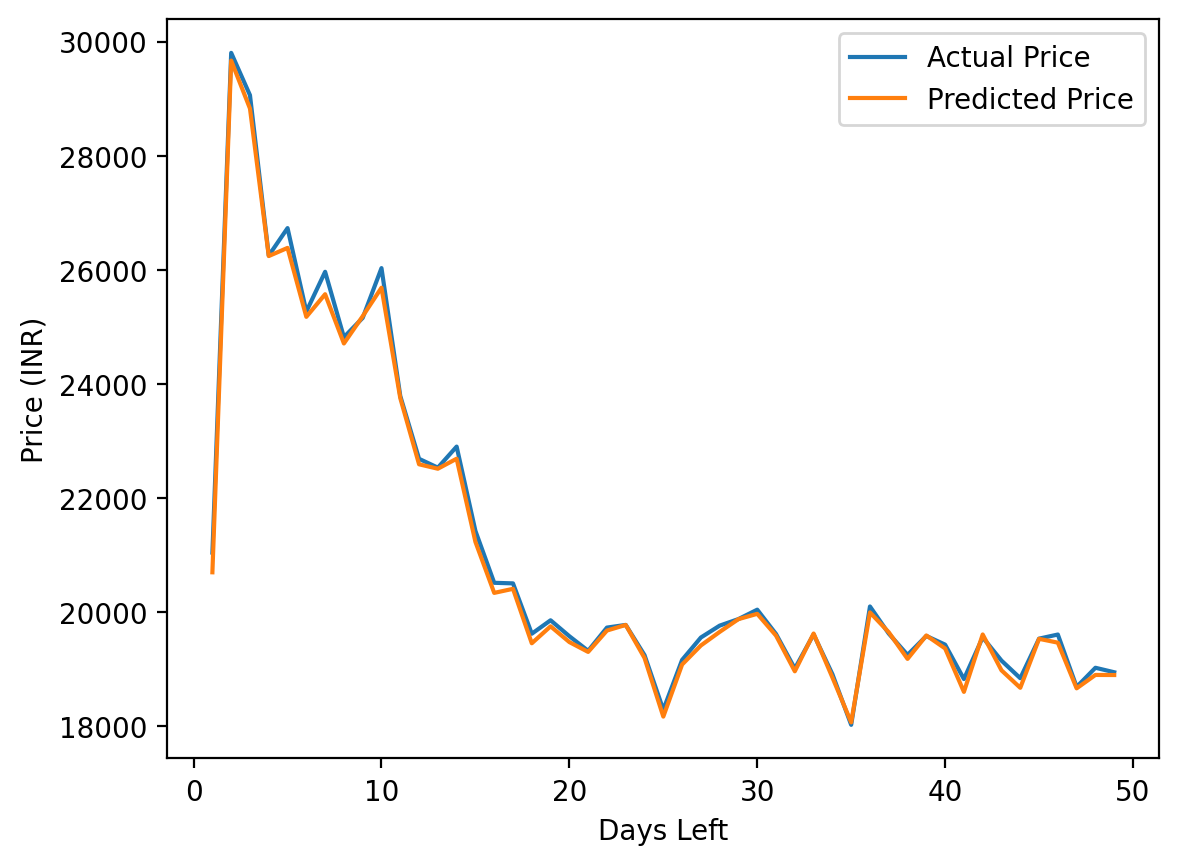

In [76]:
prices_by_days_left = predicted_df[["days_left", "price", "predicted_price"]].groupby("days_left").mean()

plt.plot(prices_by_days_left.index, prices_by_days_left["price"])
plt.plot(prices_by_days_left.index, prices_by_days_left["predicted_price"])

plt.xlabel("Days Left")
plt.ylabel("Price (INR)")
plt.legend(["Actual Price", "Predicted Price"])

plt.show()

This section calculates the mean prices for actual and predicted values grouped by both the "class" and "days_left" columns. Then, it plots two line charts side by side, each representing the actual and predicted prices for a different class ("Business" and "Economy").

We calculate the average actual prices and predicted prices based on the class and number of days left. We then create a figure with two subplots, each representing a different class (Business and Economy), and plots the average prices for each class against the number of days left. The plot provides a visual comparison between the actual and predicted prices for each class as the number of days left changes. There is a dip in the flight ticket price for both the classes with increase of the number of days left.

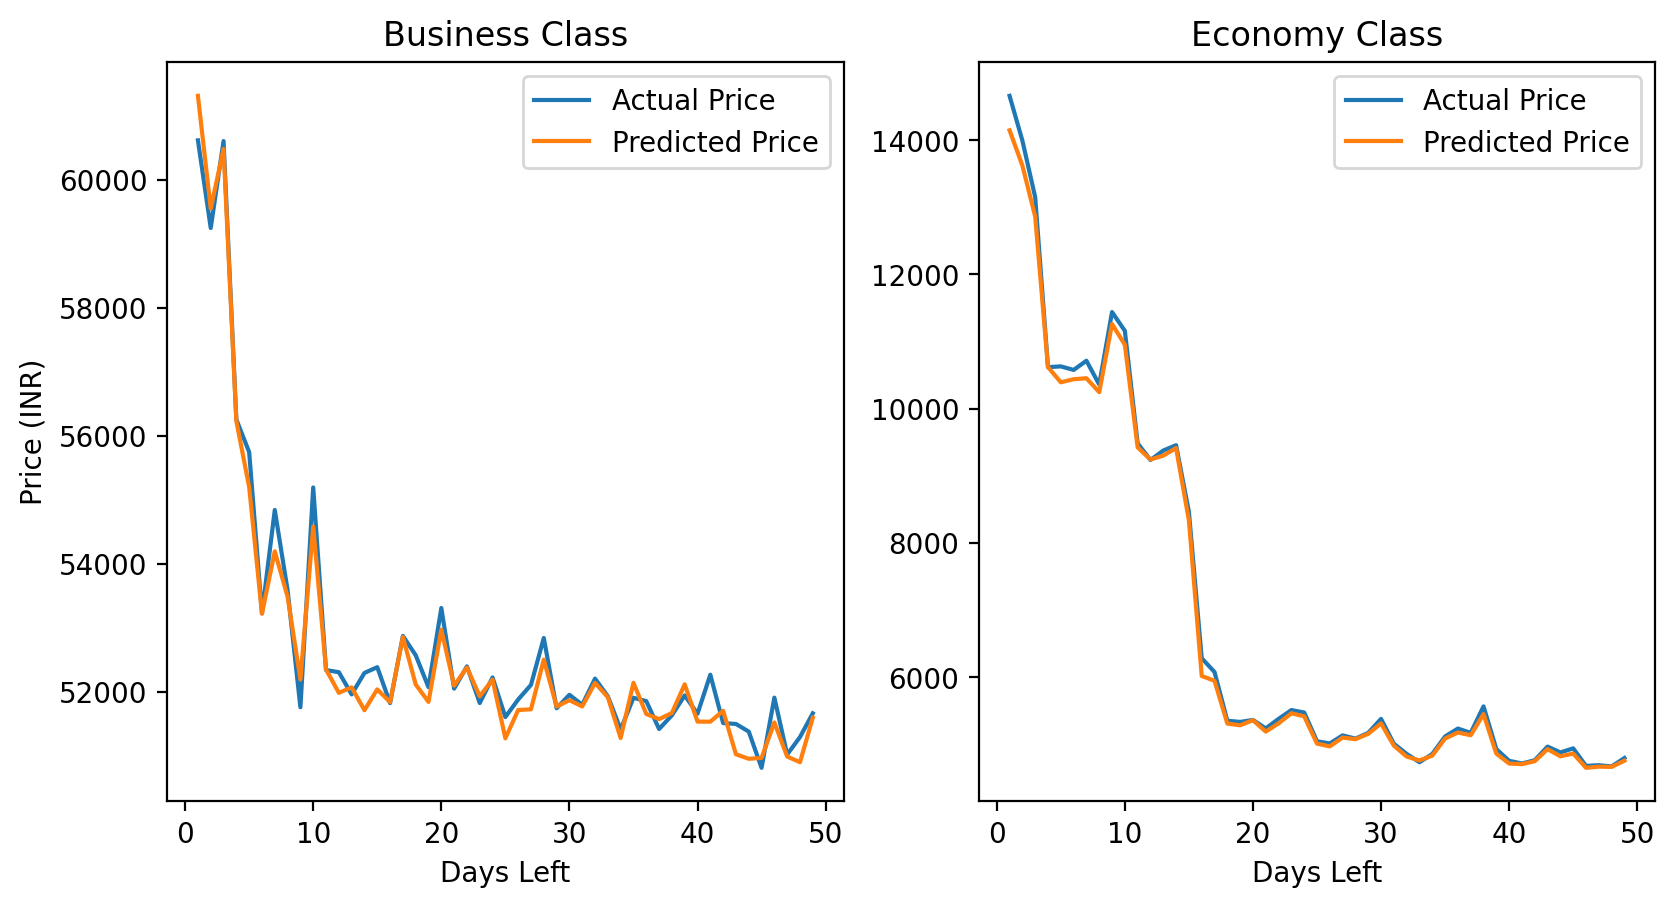

In [94]:
prices_by_days_left = predicted_df[["class", "days_left", "price", "predicted_price"]].groupby(["class", "days_left"]).mean()

plt.figure(figsize=(9.6, 4.8))
plt.subplot(1, 2, 1)
plt.plot(prices_by_days_left.loc["Business"].index, prices_by_days_left.loc["Business"]["price"])
plt.plot(prices_by_days_left.loc["Business"].index, prices_by_days_left.loc["Business"]["predicted_price"])

plt.title("Business Class")
plt.xlabel("Days Left")
plt.ylabel("Price (INR)")
plt.legend(["Actual Price", "Predicted Price"])

plt.subplot(1, 2, 2)
plt.plot(prices_by_days_left.loc["Economy"].index, prices_by_days_left.loc["Economy"]["price"])
plt.plot(prices_by_days_left.loc["Economy"].index, prices_by_days_left.loc["Economy"]["predicted_price"])

plt.title("Economy Class")
plt.xlabel("Days Left")
plt.legend(["Actual Price", "Predicted Price"])

plt.show()

## 6.1 Error Distribution

This section provides information about the distribution of deviations between the predicted prices and actual prices in the predicted_df DataFrame.

It provides information such as the count (number of non-null values), mean (average), standard deviation, minimum and maximum values, as well as quartiles (25th, 50th, and 75th percentiles). These statistics offer insights into the central tendency, spread, and range of the deviation values in the predicted_df DataFrame

In [78]:
predicted_df["deviation"].describe()

count    75065.000000
mean       -95.526713
std       2335.634193
min     -46240.171834
25%       -310.070898
50%         28.512679
75%        448.412478
max      26699.322927
Name: deviation, dtype: float64

This section calculates specific quantiles (percentiles) for the "deviation" column in the predicted_df DataFrame.

The 90th percentile represents the value below which 90% of the deviation values fall.

The 95th percentile represents the value below which 95% of the deviation values fall.

The 99th percentile represents the value below which 99% of the deviation values fall.

These quantile values provide insights into the distribution of the deviation values and help understand the range within which most of the data points are concentrated.

In [79]:
print(predicted_df["deviation"].quantile(0.9))
print(predicted_df["deviation"].quantile(0.95))
print(predicted_df["deviation"].quantile(0.99))

1494.142427456703
2555.6950093629525
5771.390596539611


The output provides insights into the deviation values for each class, allowing for a comparison of the distribution and central tendency between different classes.

In [80]:
predicted_df[["class", "deviation"]].groupby("class").describe()

deviation                                                       
             count        mean          std           min          25%   
class                                                                    
Business   23348.0 -141.880800  3819.767817 -46240.171834 -1046.281135  \
Economy    51717.0  -74.599838  1153.136516 -18388.858739  -186.817769   

                                                 
                 50%          75%           max  
class                                            
Business  235.994509  1532.029274  26699.322927  
Economy    16.933275   248.300237  13020.889538

The output show the percentiles for each class, providing insights into the distribution of deviations and the variation observed within each class. We can use them to assess the magnitude of deviations from the actual prices and gain insights into the performance of the model for different classes.

In [81]:
print(predicted_df[["class", "deviation"]].groupby("class").quantile(0.9))
print(predicted_df[["class", "deviation"]].groupby("class").quantile(0.95))
print(predicted_df[["class", "deviation"]].groupby("class").quantile(0.99))

            deviation
class                
Business  3214.396975
Economy    680.270402
            deviation
class                
Business  4677.013117
Economy   1103.524758
            deviation
class                
Business  8532.653368
Economy   2467.626997


# 7. Deployment

A demo worth a thousand words. Kindly access with the link below:

https://flightp.streamlit.app/

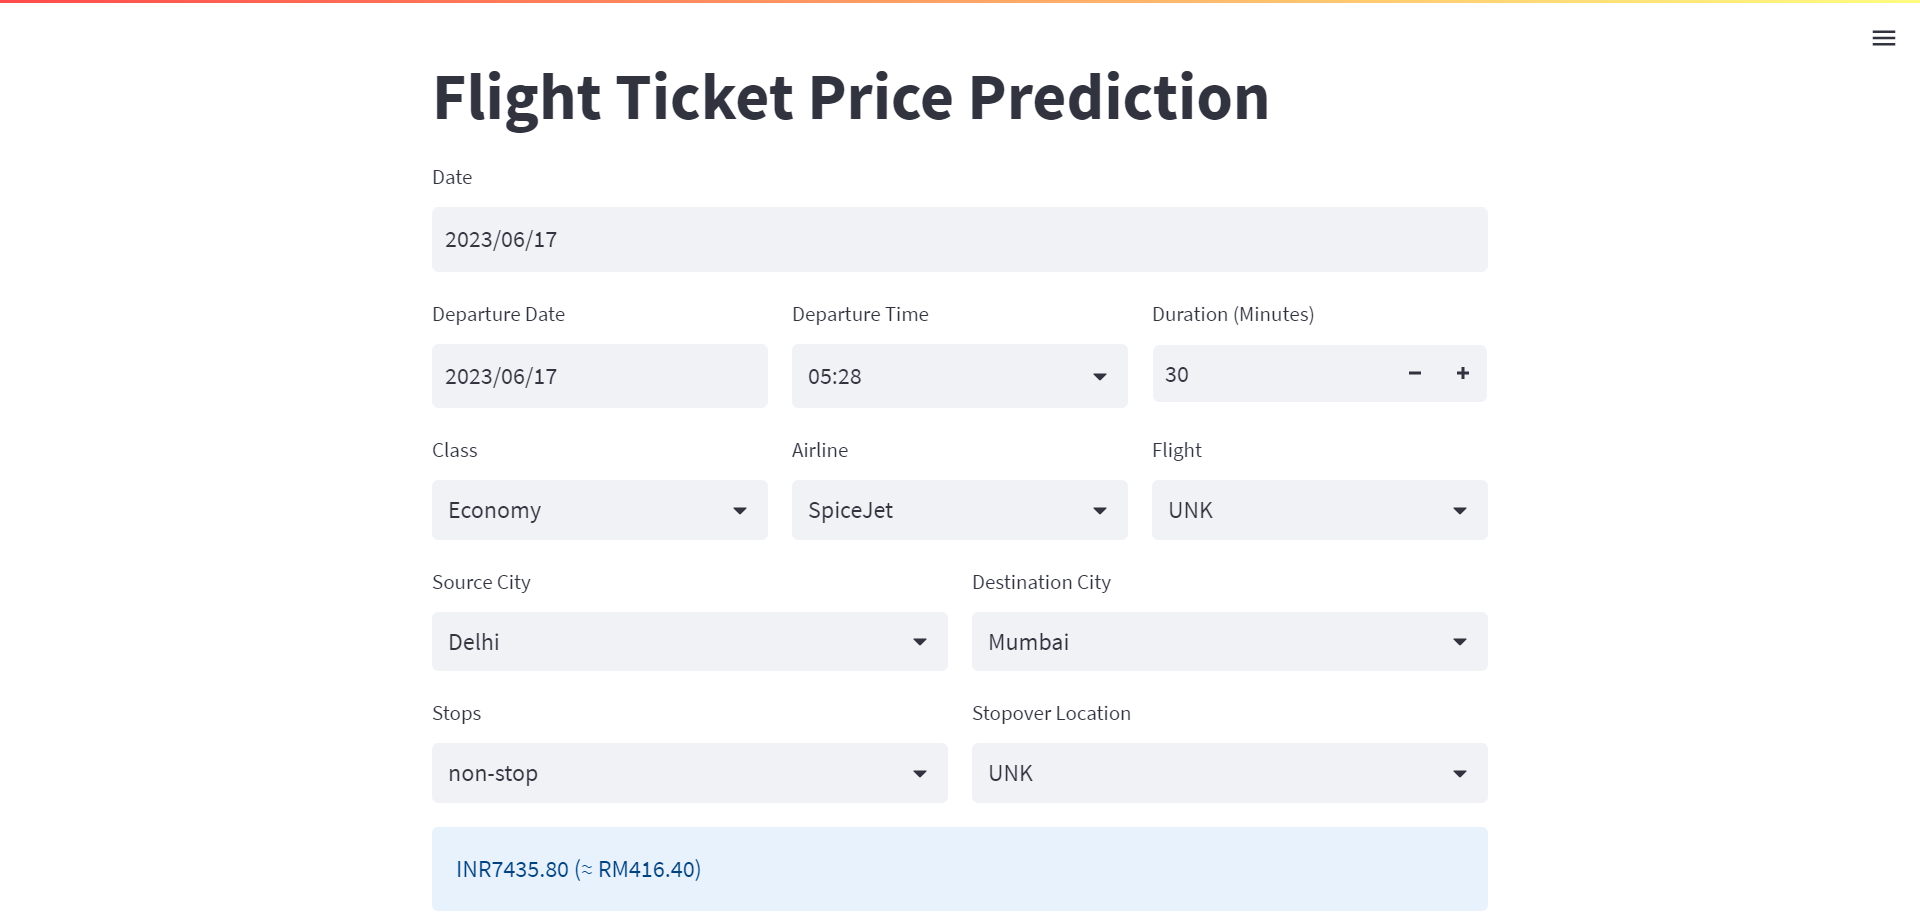

# 8. Conclusion

In conclusion, compared to other models that have been employed in this project, LightGBM is the best model to be used to estimate the price of a flight ticket, helping passengers to get the best ticket prices. This could be due to its higher efficiency and ability to handle large datasets easily. Future work should include more features such as holiday periods, metereological data etc that may impact the flight ticket price.